In [22]:
## Import pandas library
import pandas as pd

## Create dataframe from .csv
df = pd.read_csv('ufc_fight_stats_clean.csv')

# Calculate mean of SIG.STR.TOT by FIGHTER & BOUT
sig_str_avg_bout = df.groupby(['FIGHTER', 'BOUT'])['SIG.STR.TOT'].mean().reset_index()

filter_bout = sig_str_avg_bout.loc[sig_str_avg_bout['FIGHTER'] == 'Ilia Topuria']

# Calculate mean of SIG.STR.TOT by FIGHTER
sig_str_avg_fighter = sig_str_avg_bout.groupby(['FIGHTER'])['SIG.STR.TOT'].mean().reset_index()

filter_figther = sig_str_avg_fighter.loc[sig_str_avg_fighter['FIGHTER'] == 'Ilia Topuria']

## Print bout result
print(filter_bout)

## Print figther result
print(filter_figther)




           FIGHTER                                    BOUT  SIG.STR.TOT
5861  Ilia Topuria  Alexander Volkanovski vs. Ilia Topuria         38.5
5862  Ilia Topuria         Bryce Mitchell vs. Ilia Topuria         38.5
5863  Ilia Topuria          Ilia Topuria vs. Damon Jackson         63.0
5864  Ilia Topuria            Jai Herbert vs. Ilia Topuria         20.5
5865  Ilia Topuria            Josh Emmett vs. Ilia Topuria         68.8
5866  Ilia Topuria              Ryan Hall vs. Ilia Topuria         32.0
5867  Ilia Topuria          Youssef Zalal vs. Ilia Topuria         11.0
          FIGHTER  SIG.STR.TOT
948  Ilia Topuria         38.9


In [23]:
# Ranking of SIG.STR.TOT by FIGHTER and WEIGHT class

## Load dataframes
df1 = sig_str_avg_fighter
df2 = pd.read_csv('ufc_fighter_tott.csv')

## Merge WEIGHT column from 'ufc_fighter_tot.csv' to 'sig_str_avg_fighter' 
df = pd.merge(df1, df2[['FIGHTER','WEIGHT']], on='FIGHTER', how='left')

## Sort FIGTHER column by WEIGHT and SIG.STR.TOT
df = df.sort_values(by=['WEIGHT', 'SIG.STR.TOT'], ascending=[False,True]).reset_index(drop=True)

## Create new RANKING column (reset in each WEIGHT)
df['RANKING'] = df.groupby('WEIGHT').cumcount() + 1

## Select/Sort columns
df_ranking = df[['RANKING', 'WEIGHT', 'FIGHTER', 'SIG.STR.TOT']]

## Top20 filtered by weight class 
df_ranking_top20 = df_ranking.loc[df_ranking['RANKING'] <= 20]

print(df_ranking_top20)

      RANKING    WEIGHT              FIGHTER  SIG.STR.TOT
0           1  770 lbs.  Emmanuel Yarborough     5.000000
1           1  410 lbs.       Thomas Ramirez     2.000000
2           1  400 lbs.           John Matua     0.000000
3           1  350 lbs.           Koji Kitao     2.000000
4           1  345 lbs.           Dan Bobish    11.000000
...       ...       ...                  ...          ...
2491        7        --       Saeed Hosseini     5.000000
2492        8        --          Jack Nilson    13.000000
2493        9        --       Adriano Santos    36.000000
2494       10        --        Noe Hernandez    38.000000
2495       11        --           Mike Davis    42.566667

[470 rows x 4 columns]


VISUALIZATION

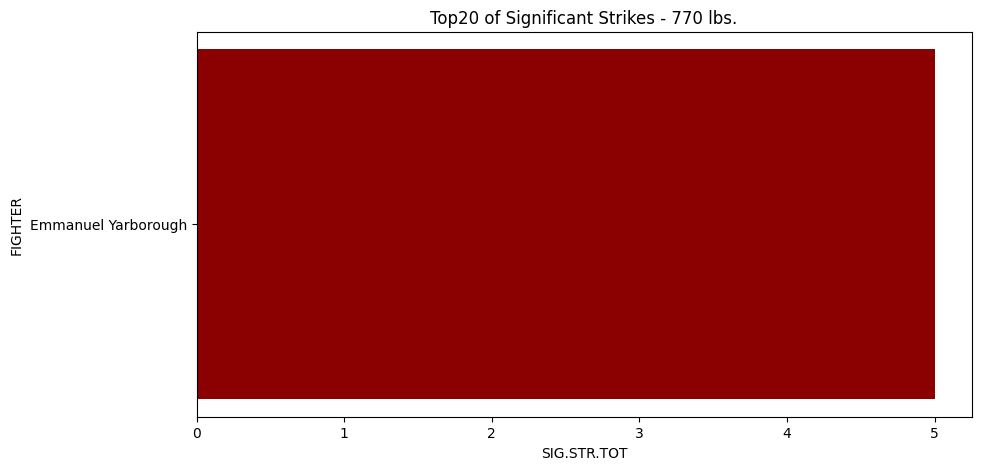

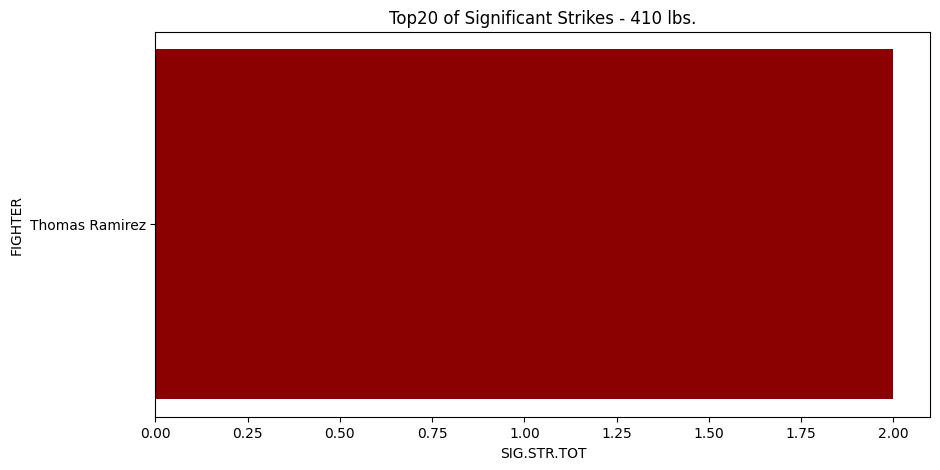

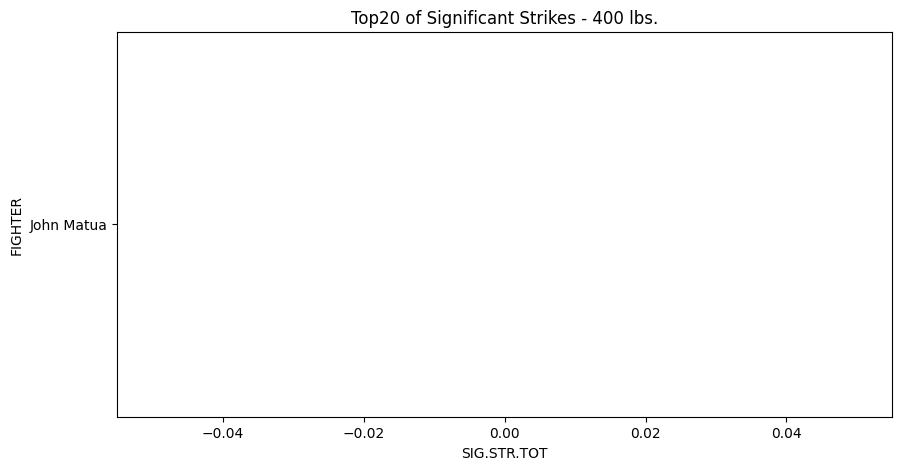

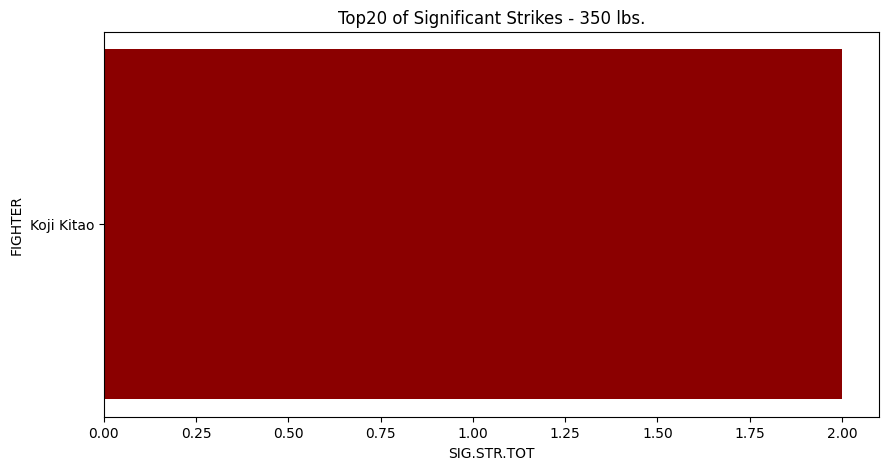

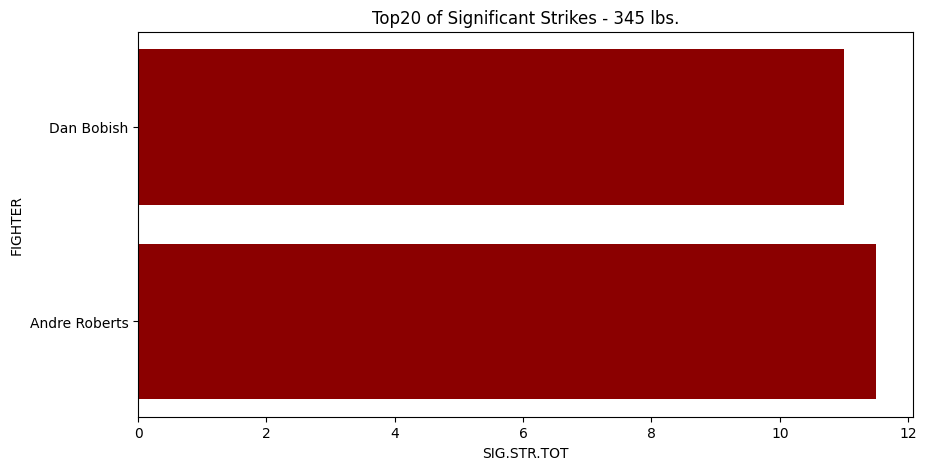

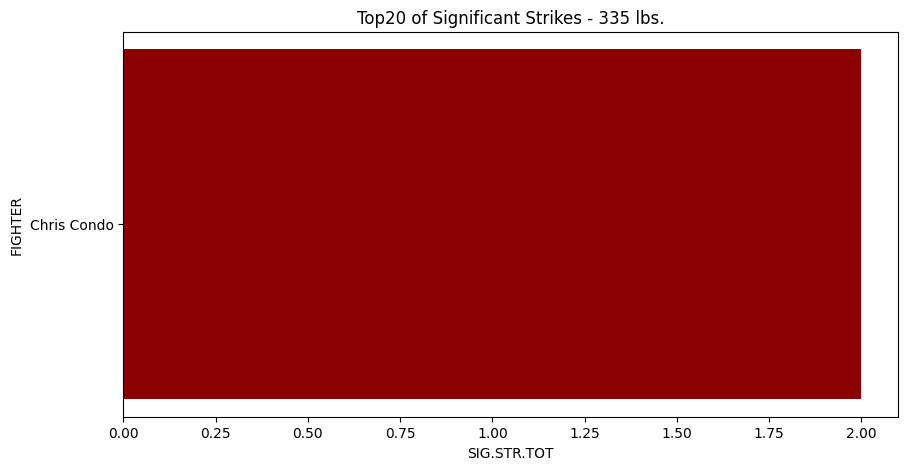

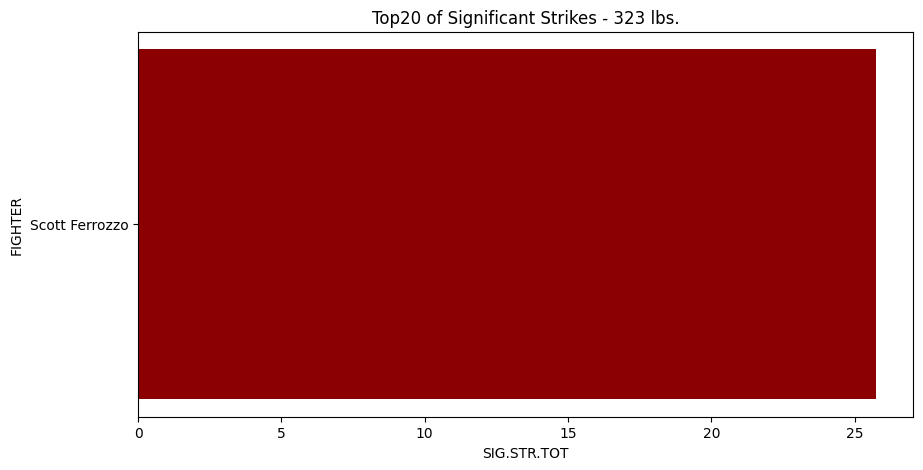

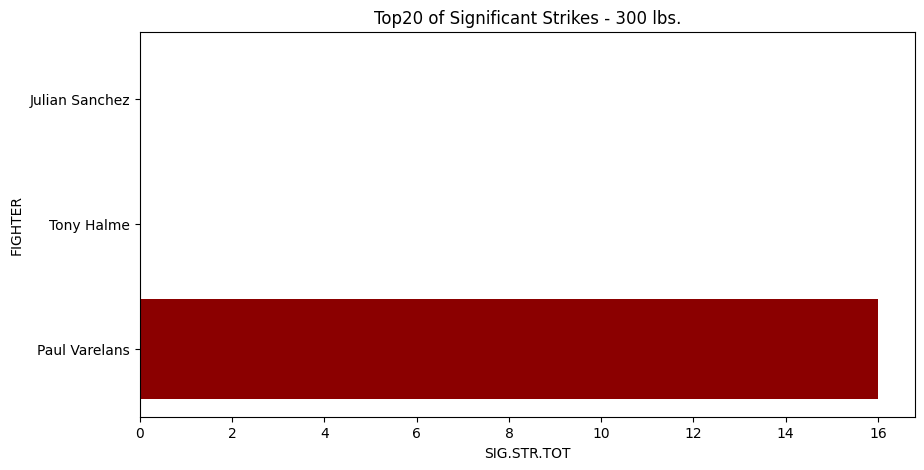

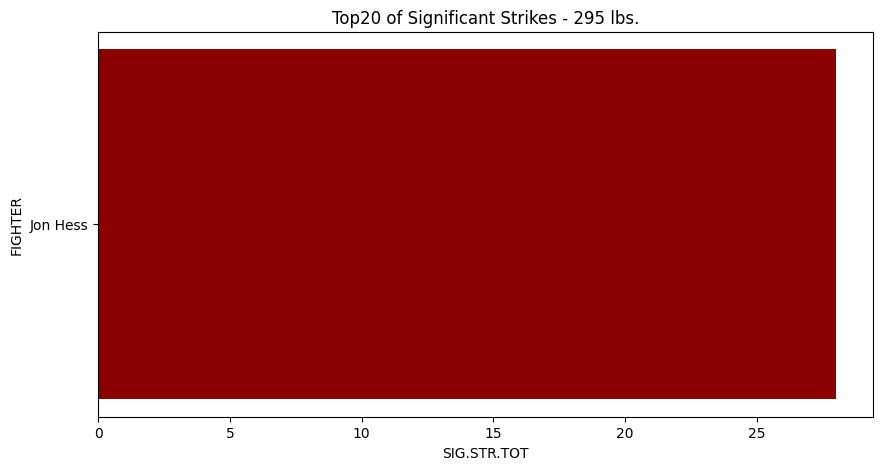

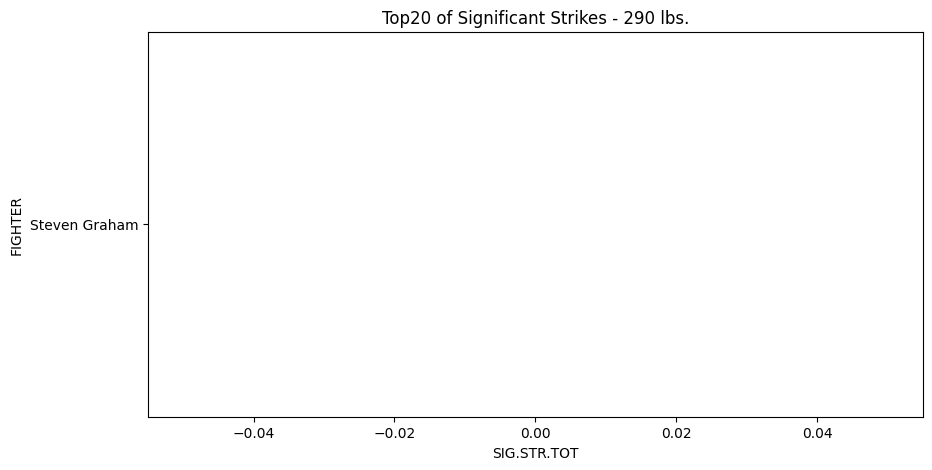

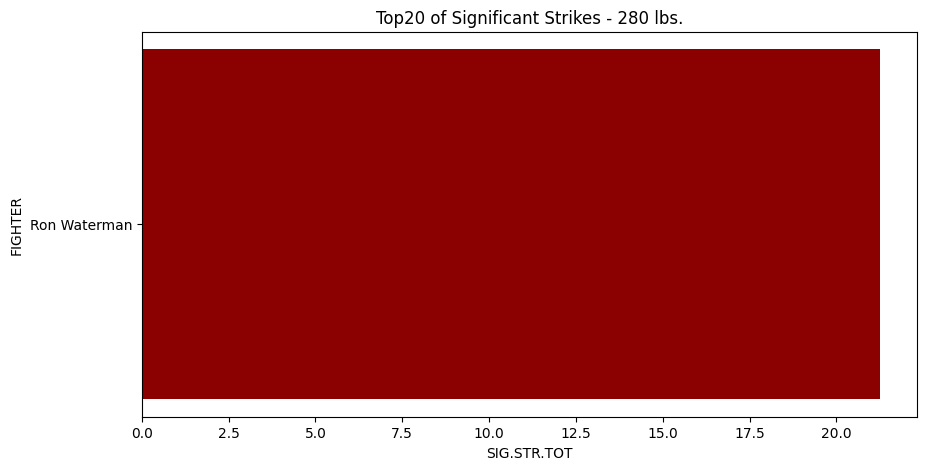

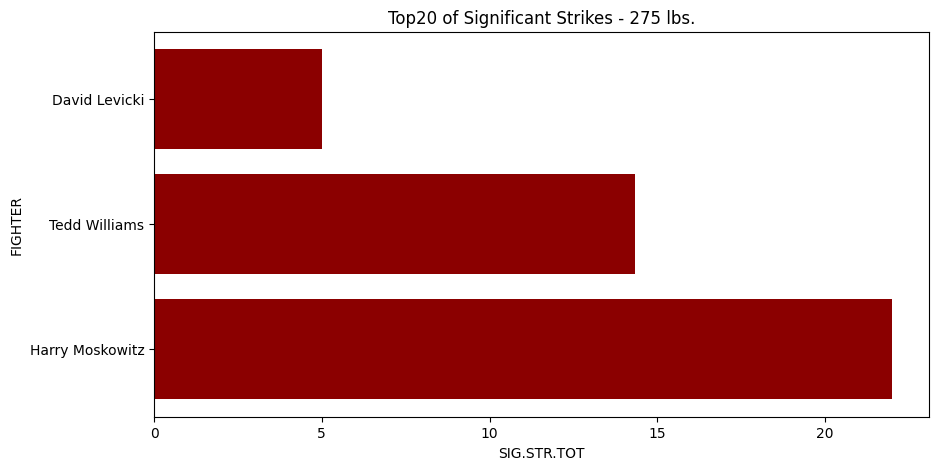

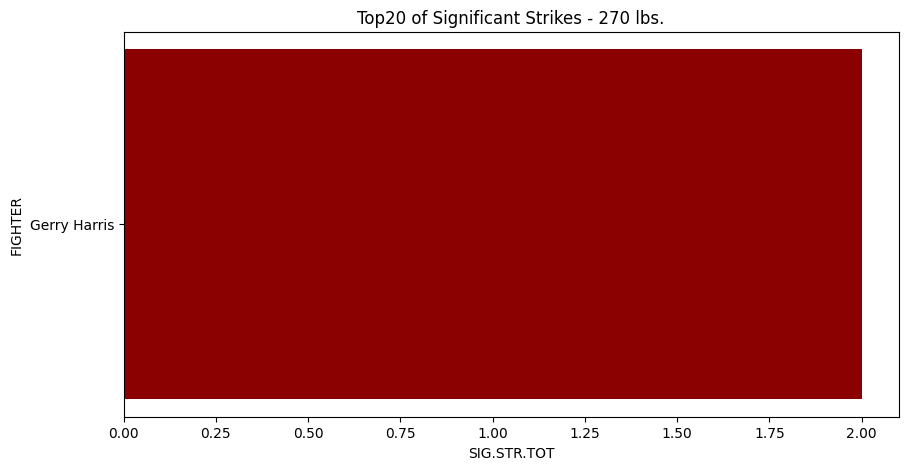

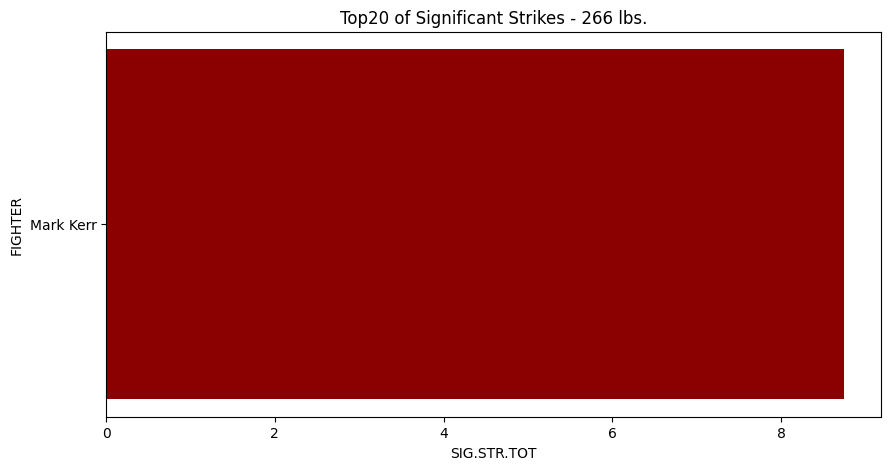

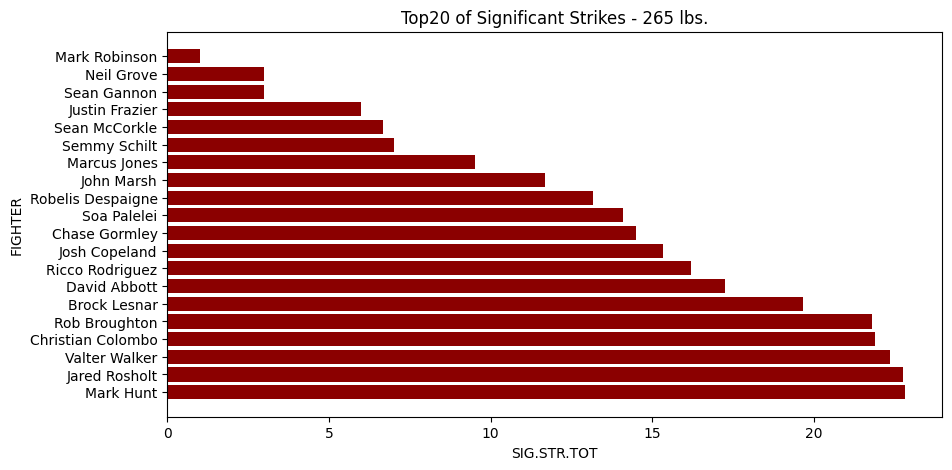

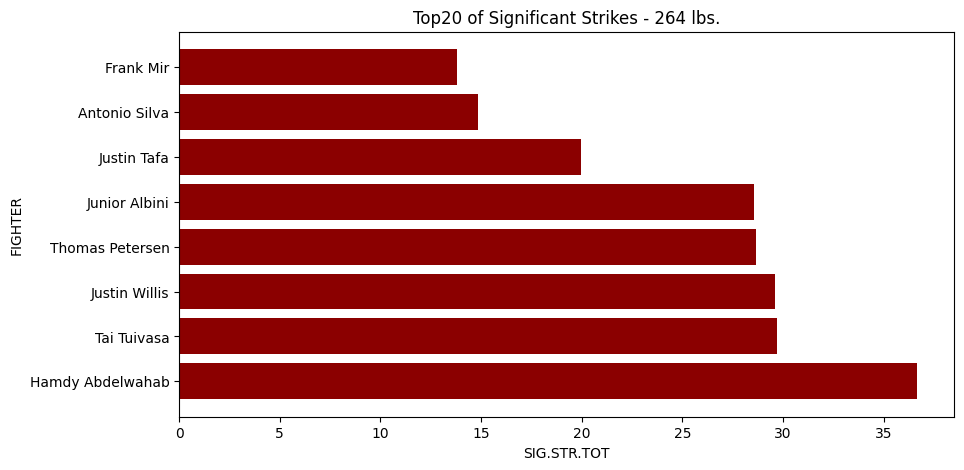

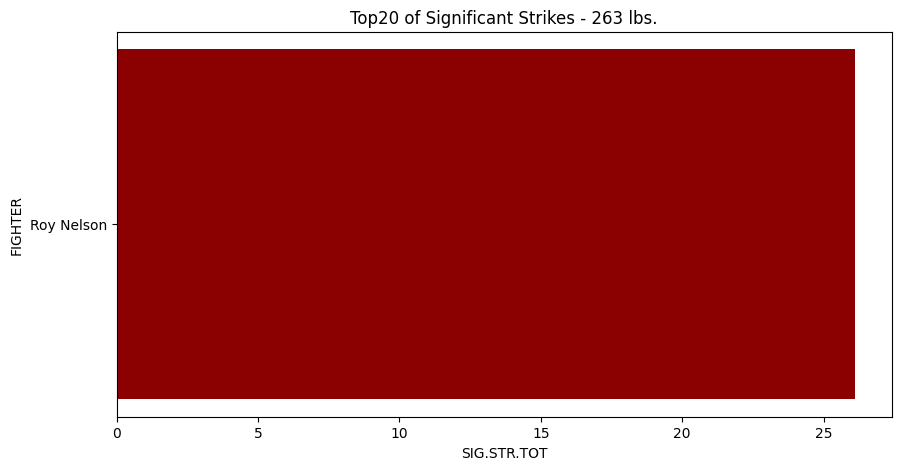

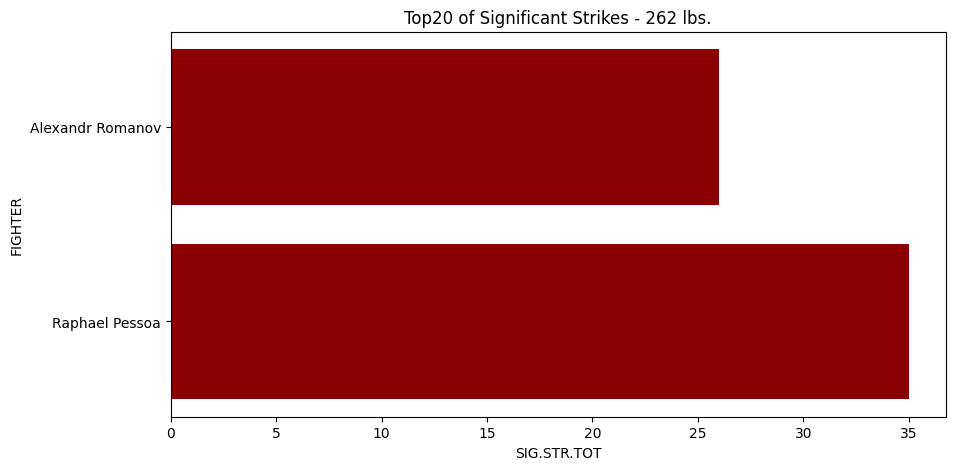

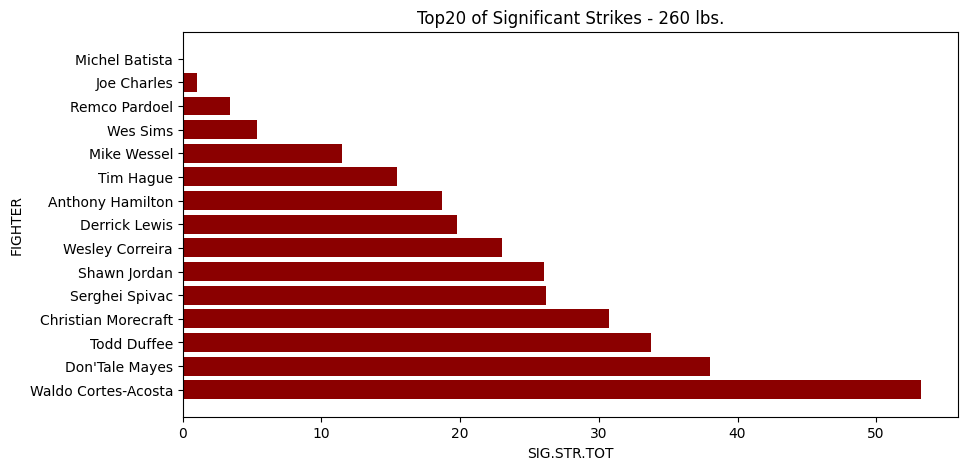

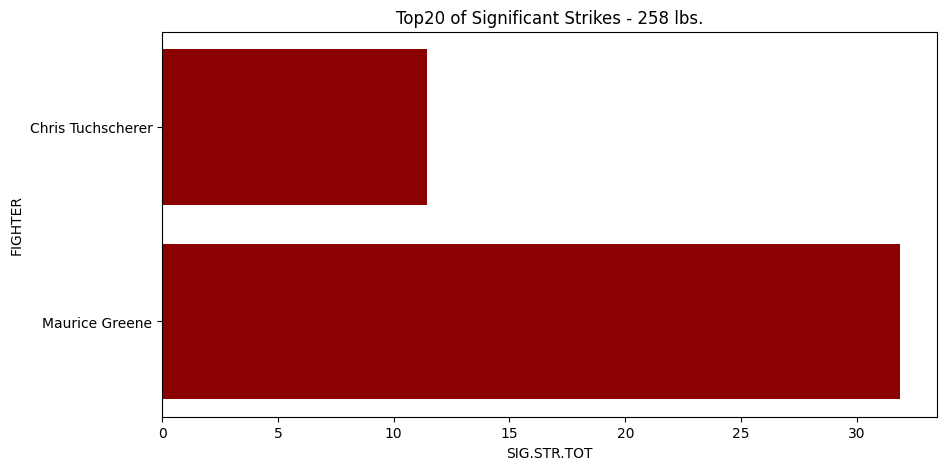

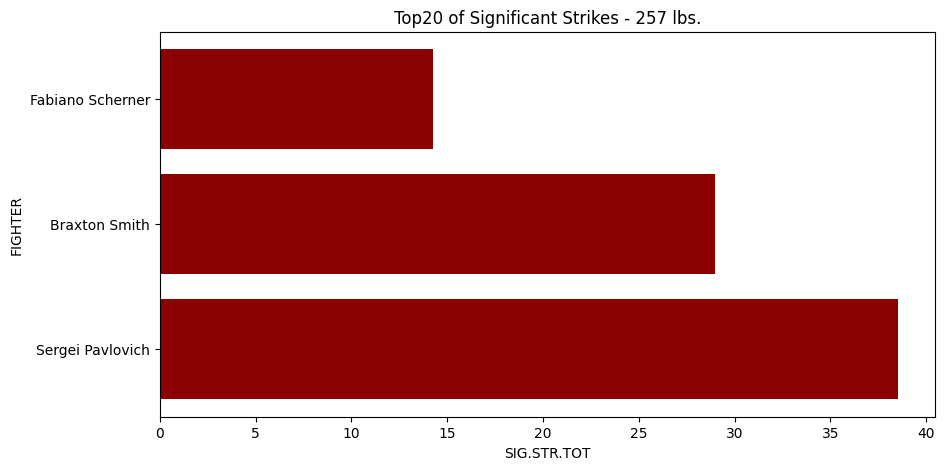

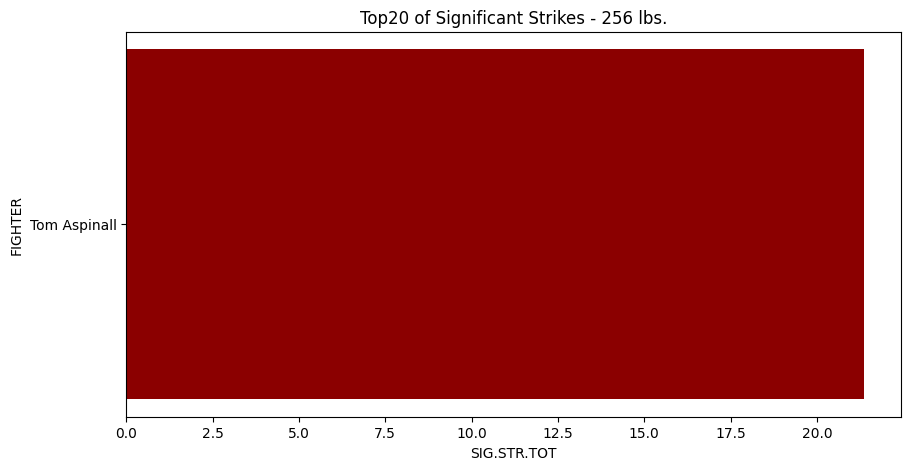

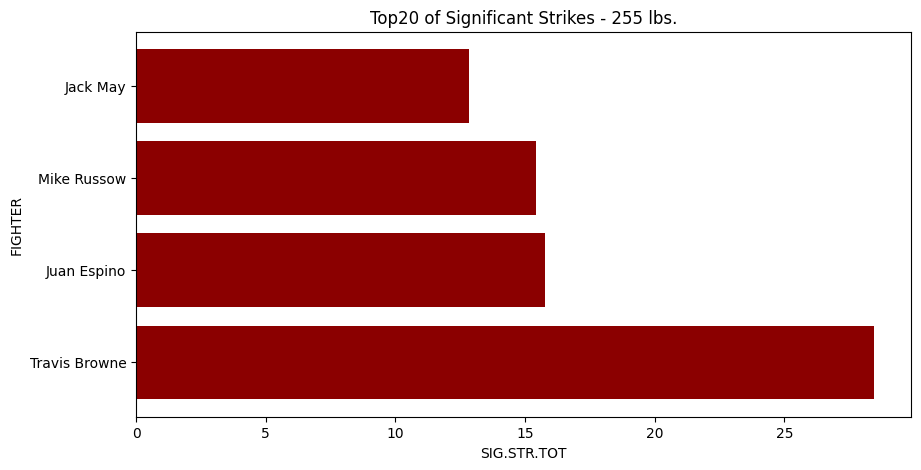

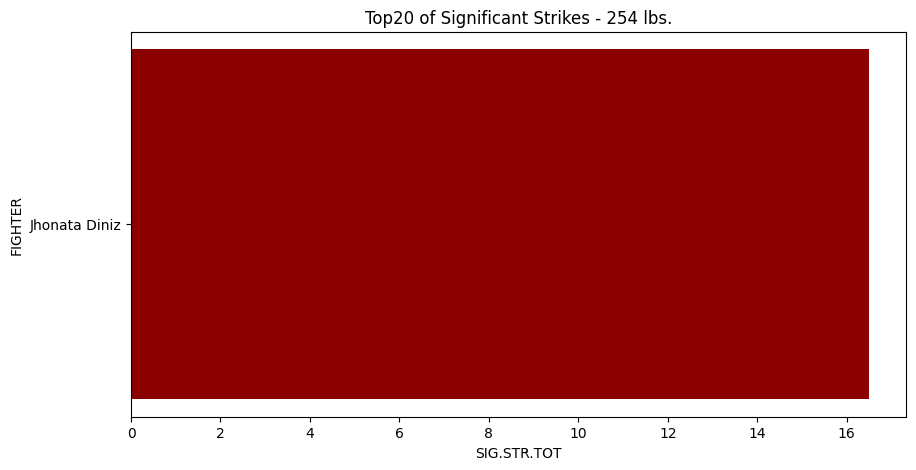

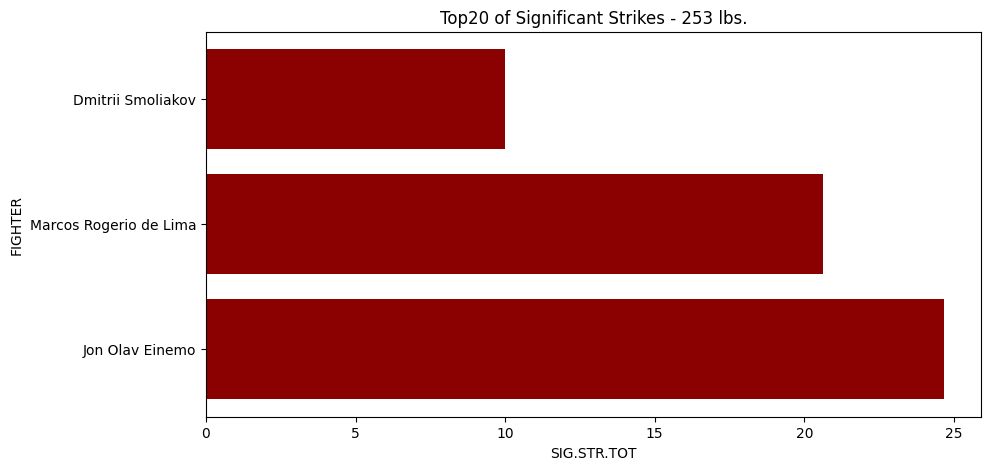

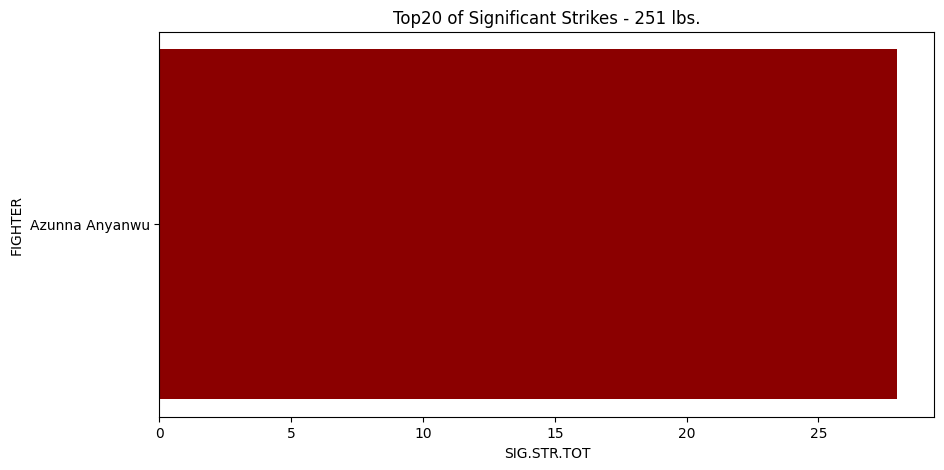

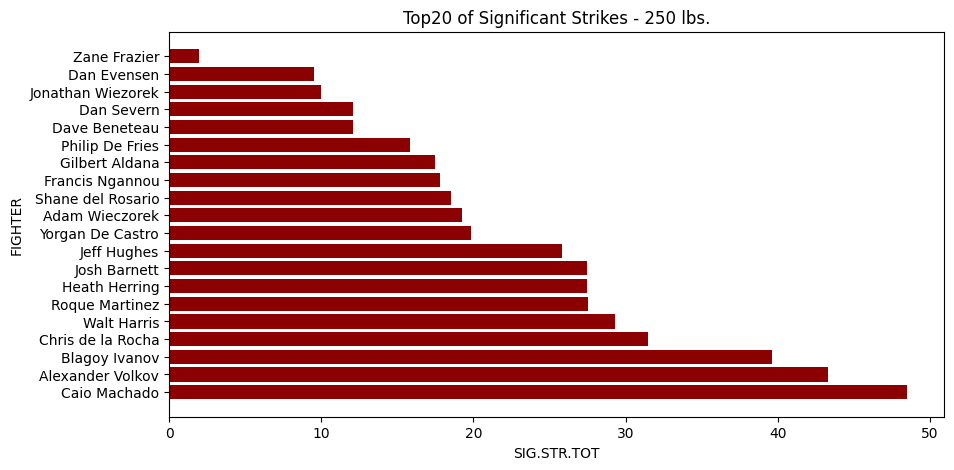

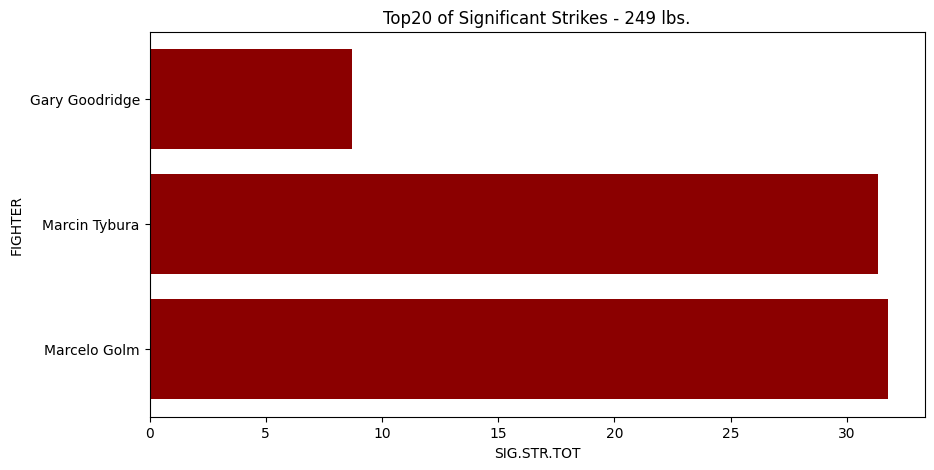

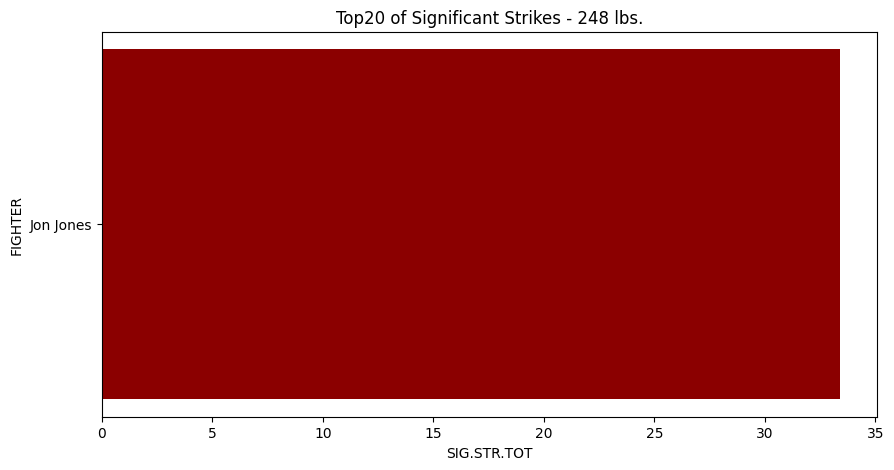

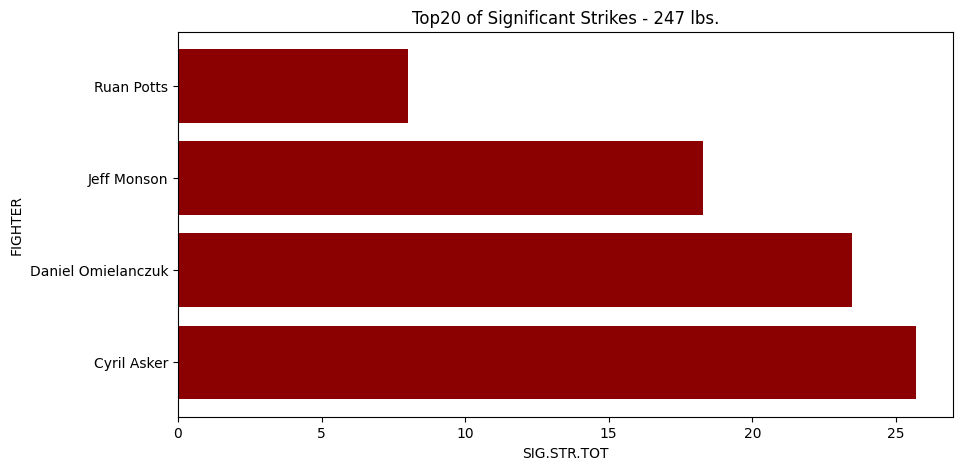

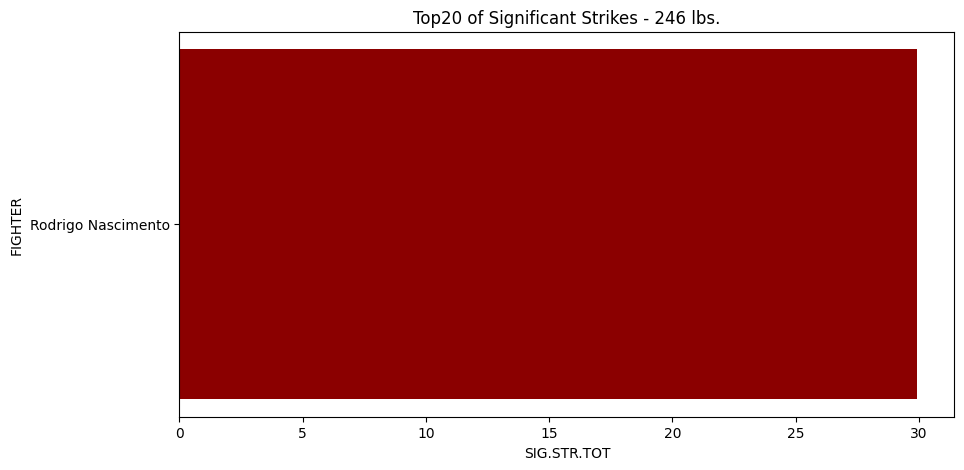

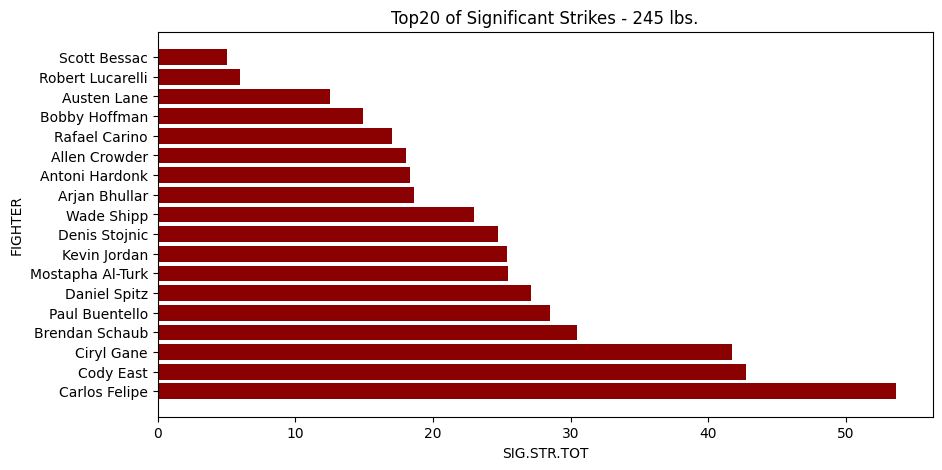

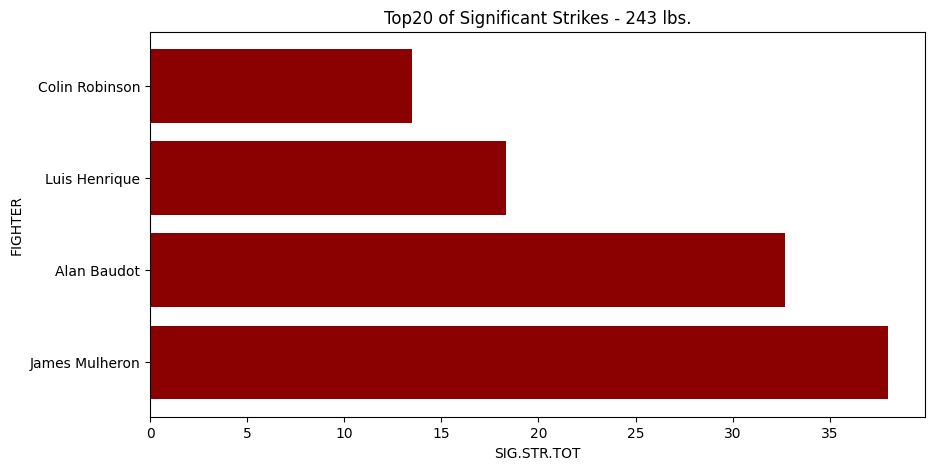

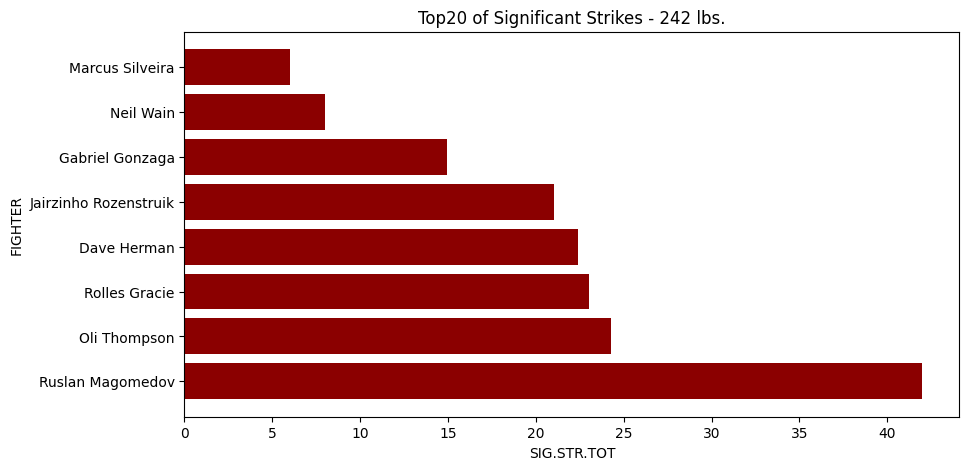

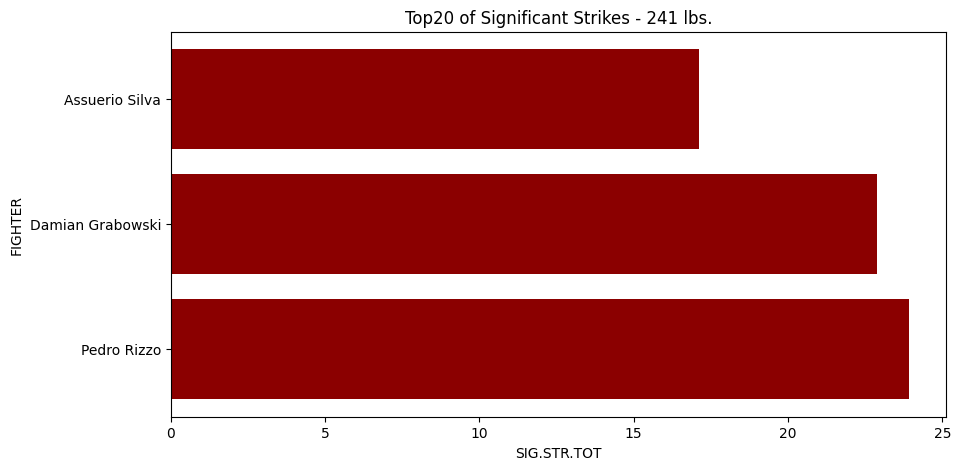

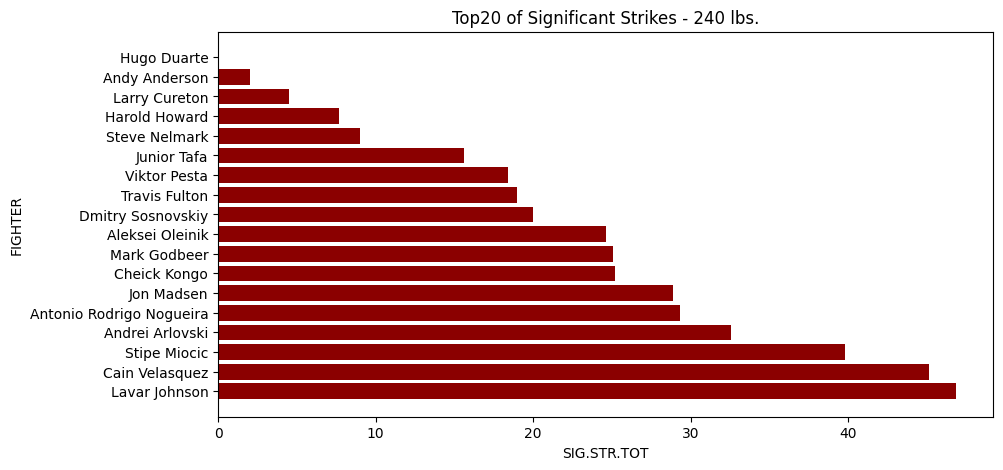

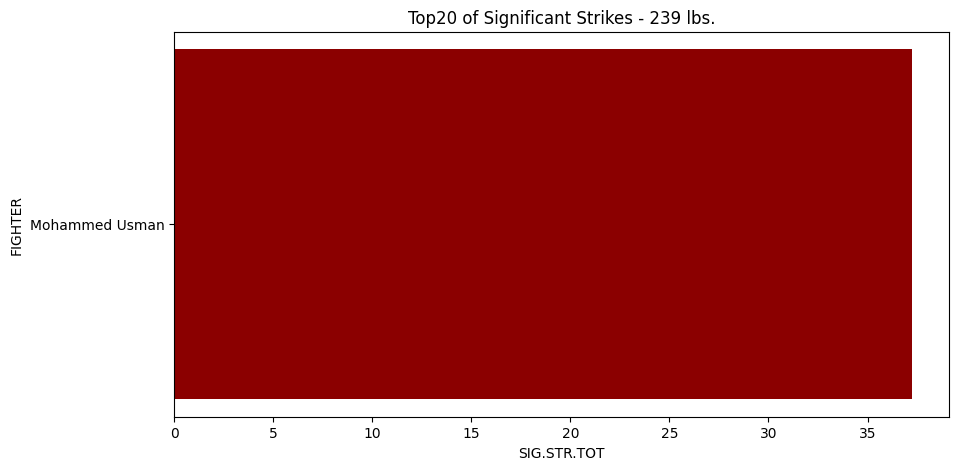

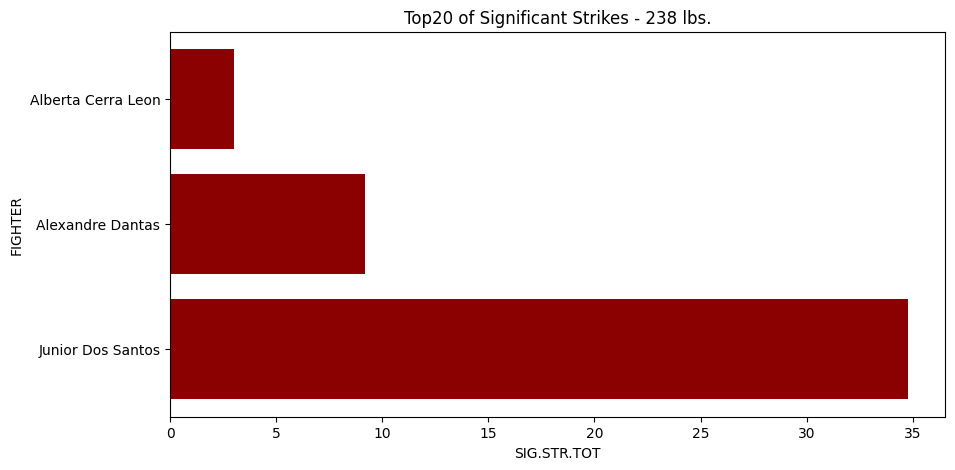

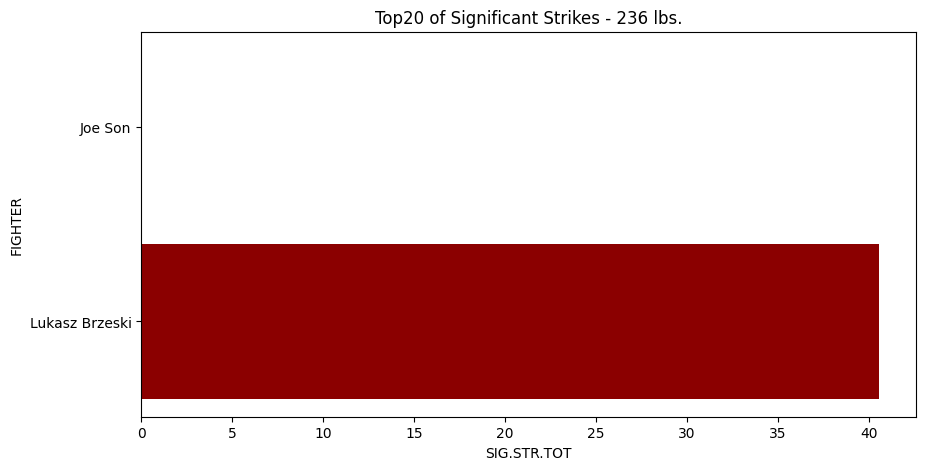

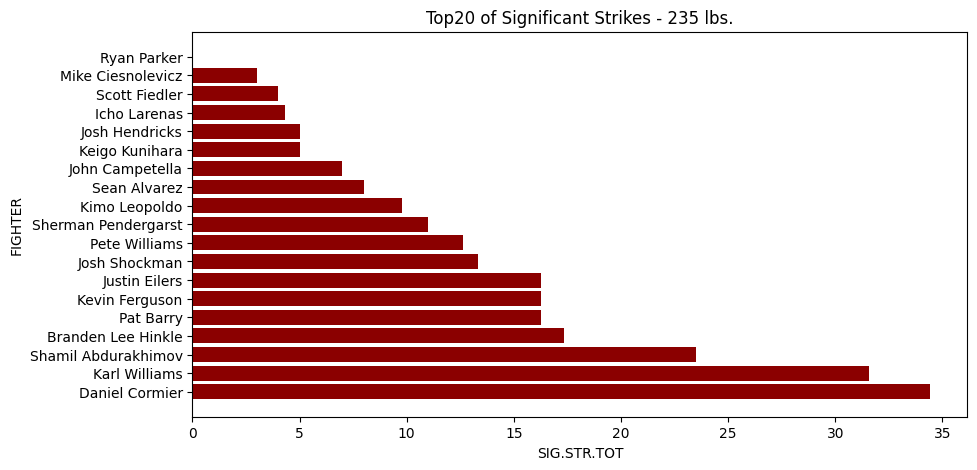

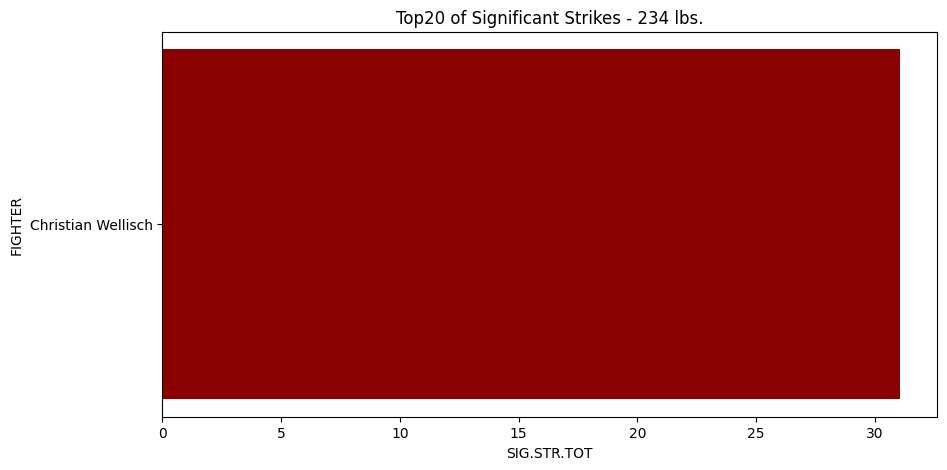

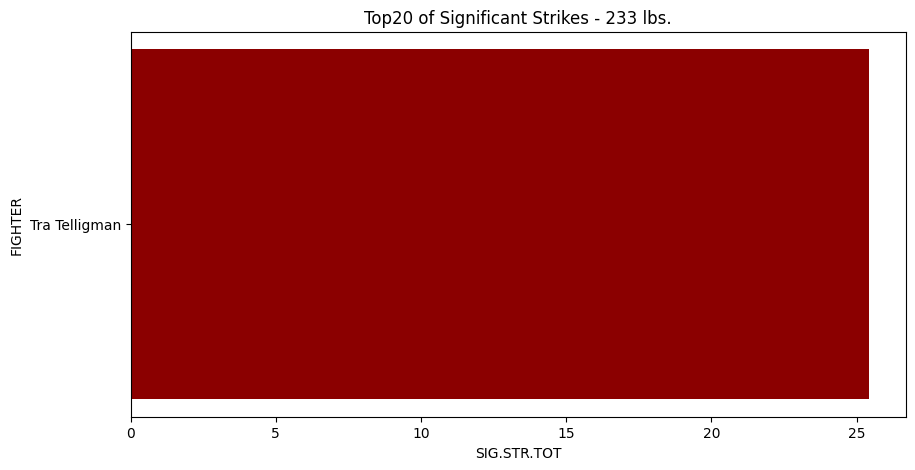

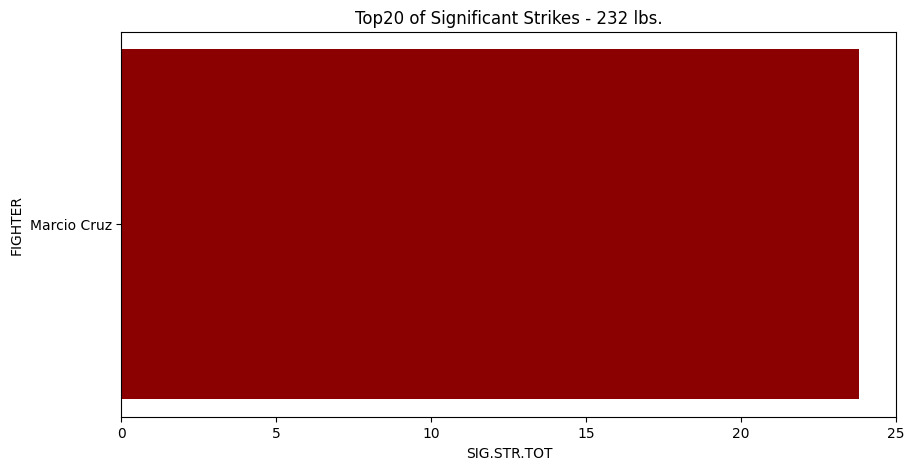

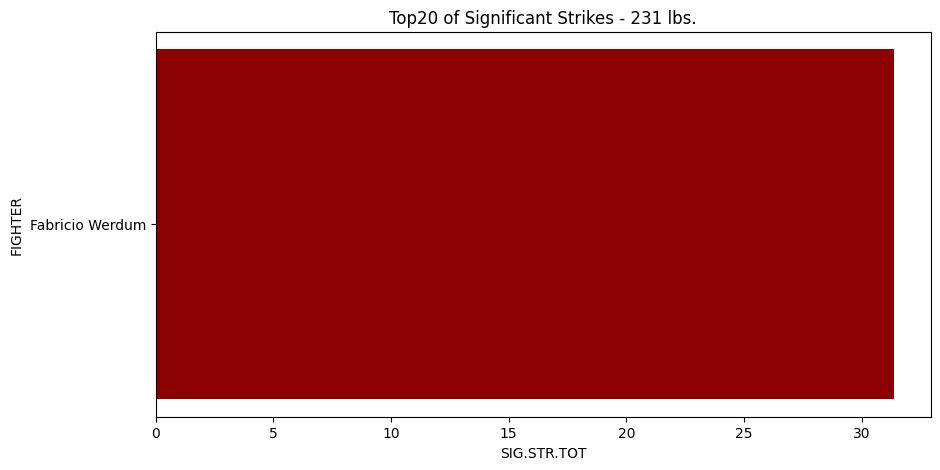

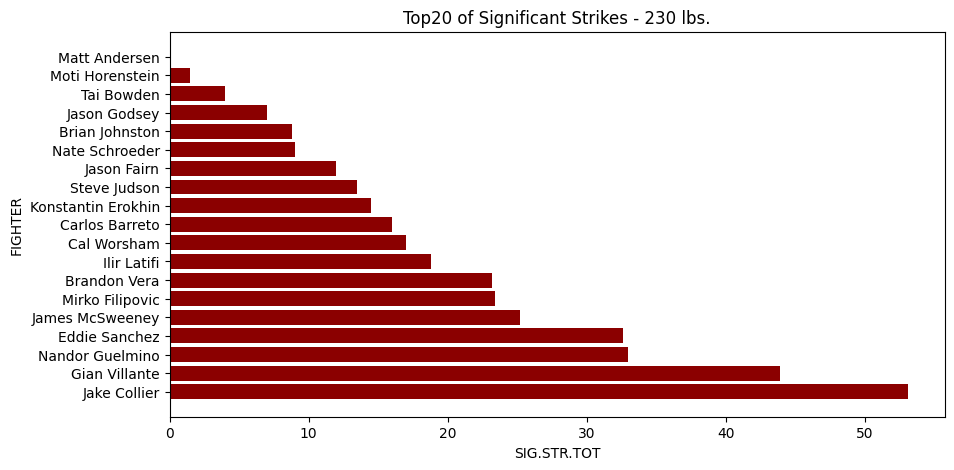

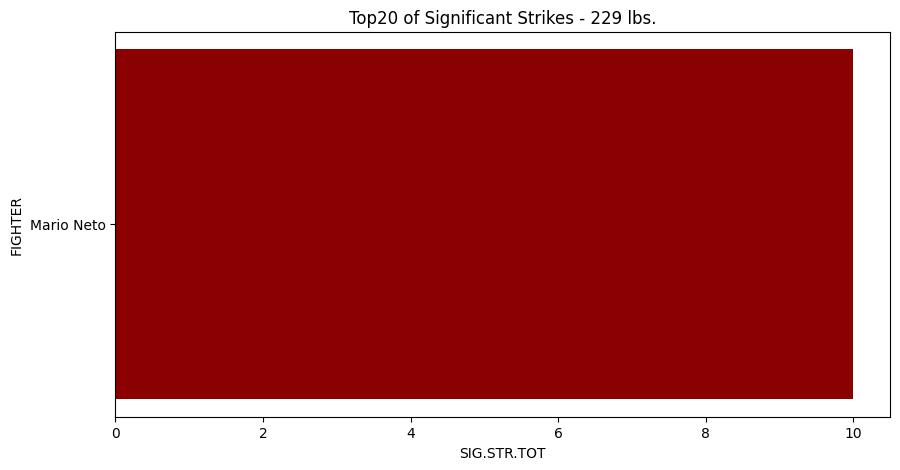

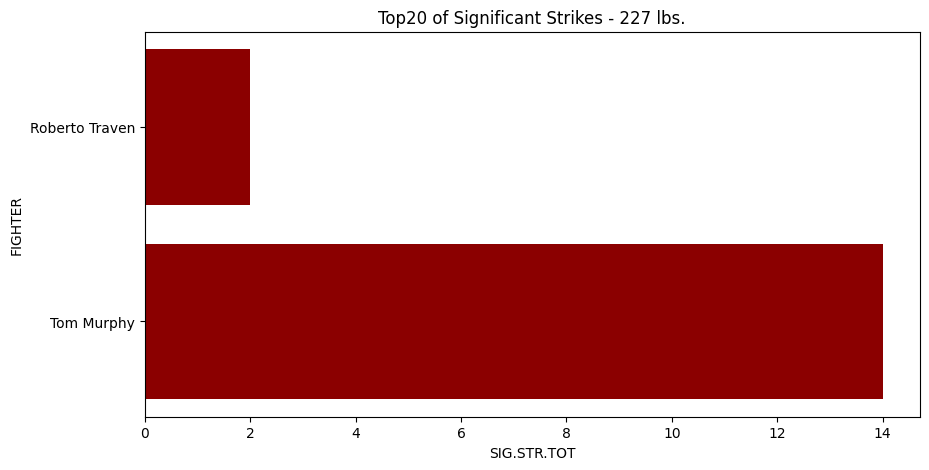

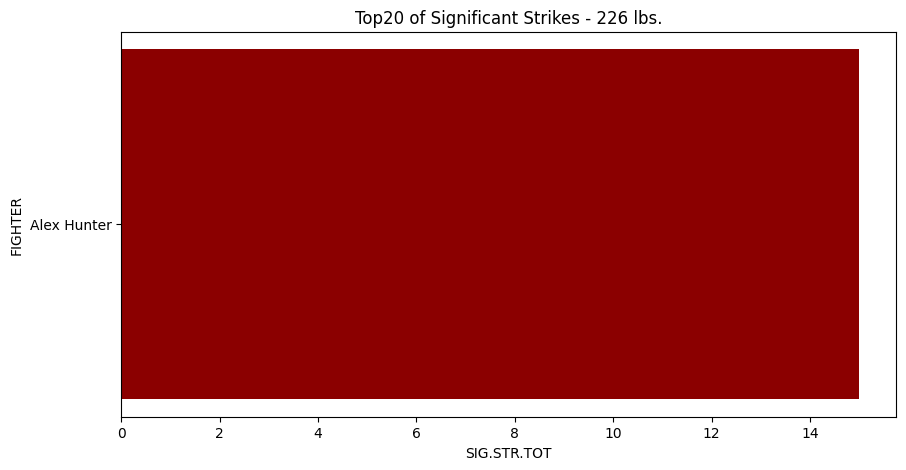

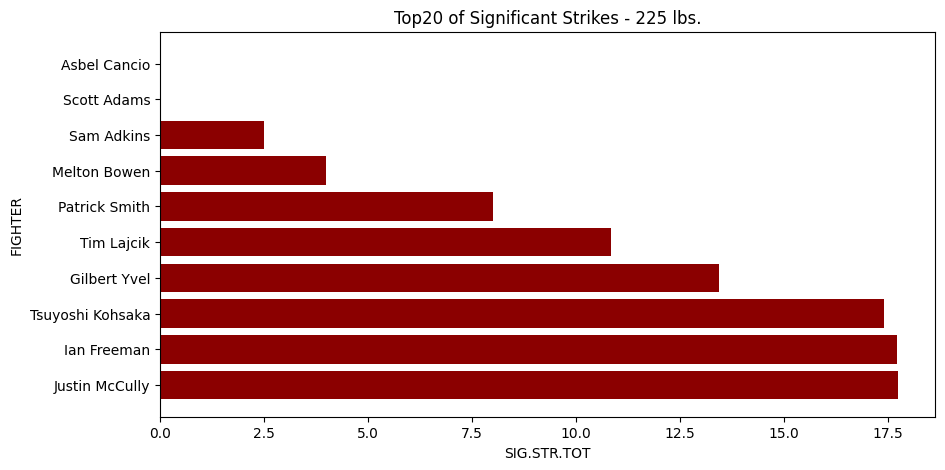

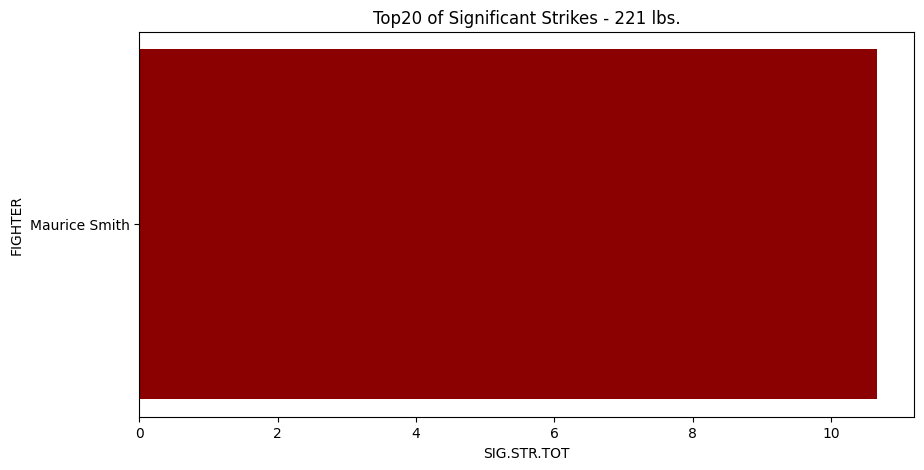

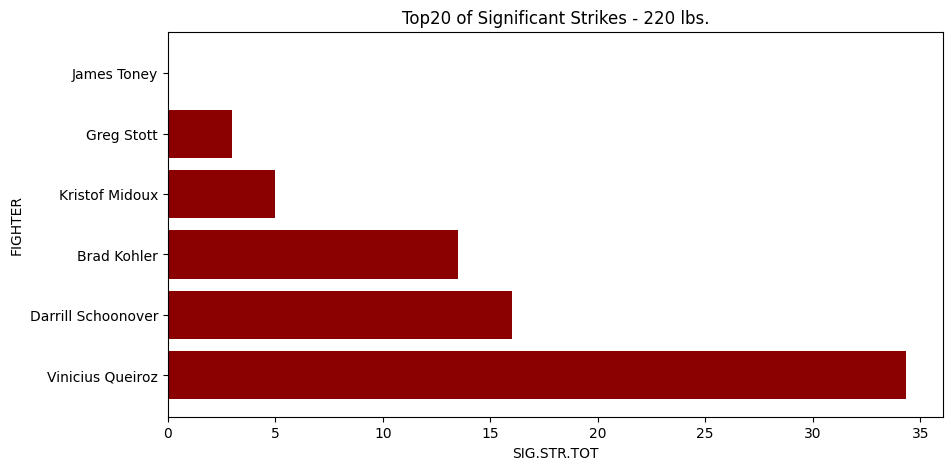

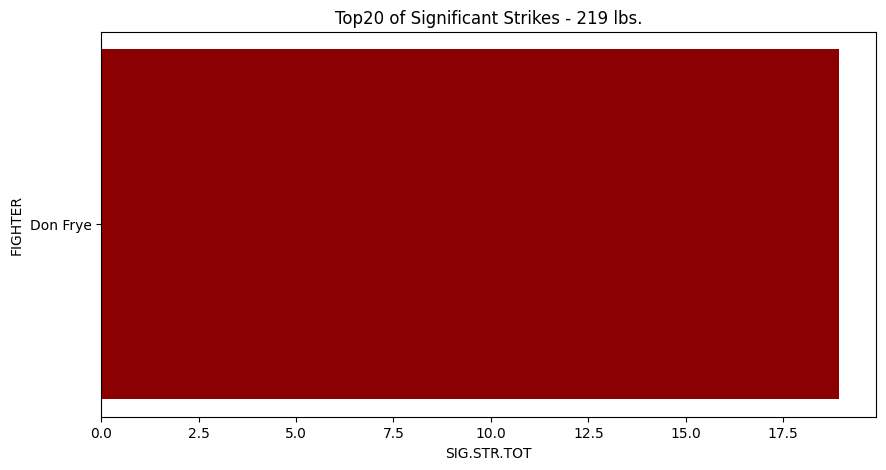

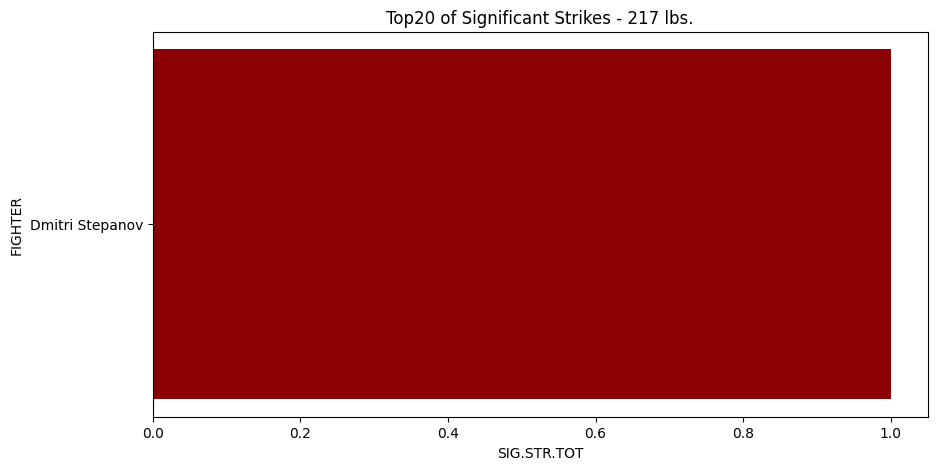

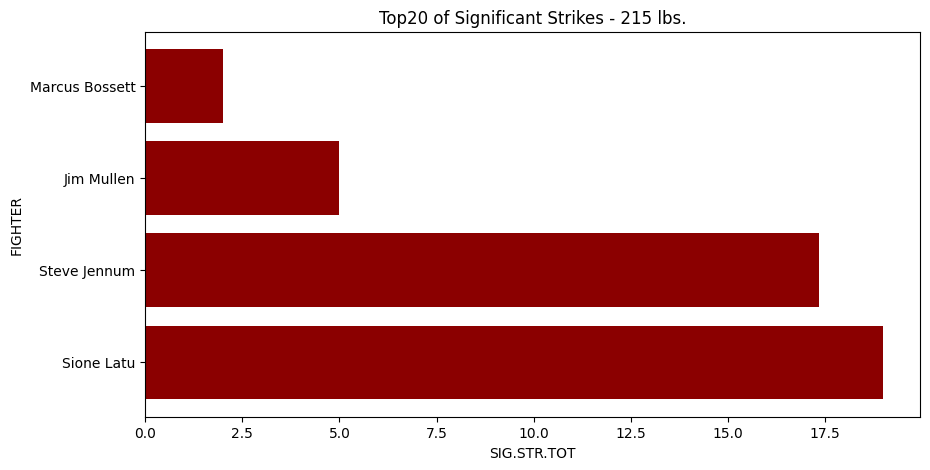

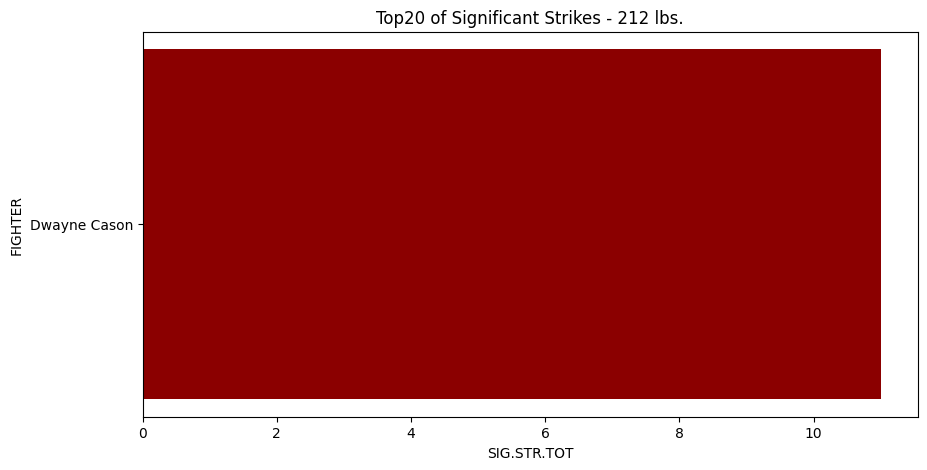

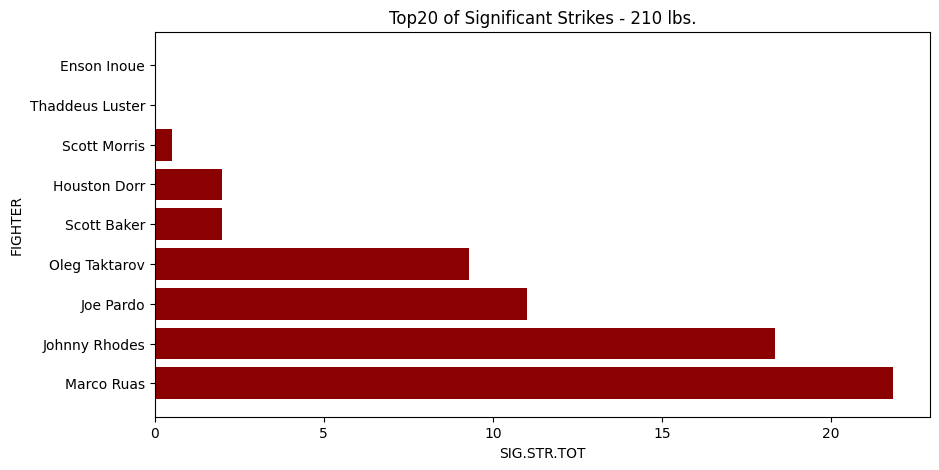

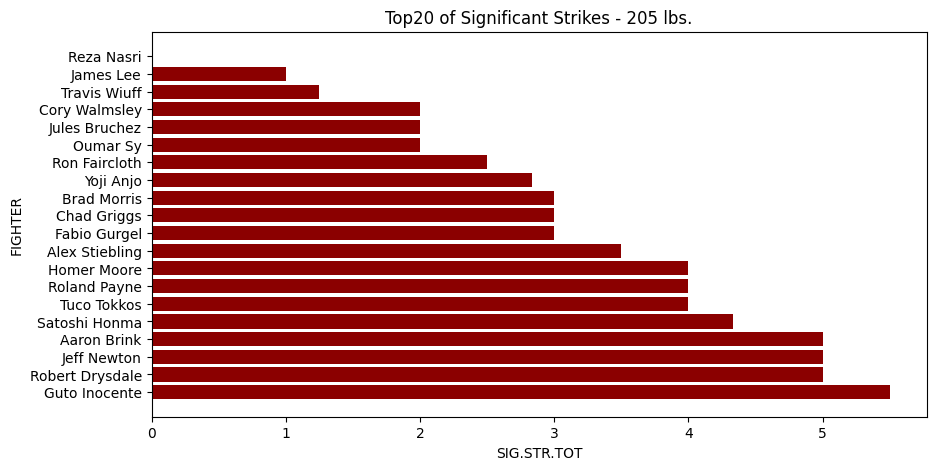

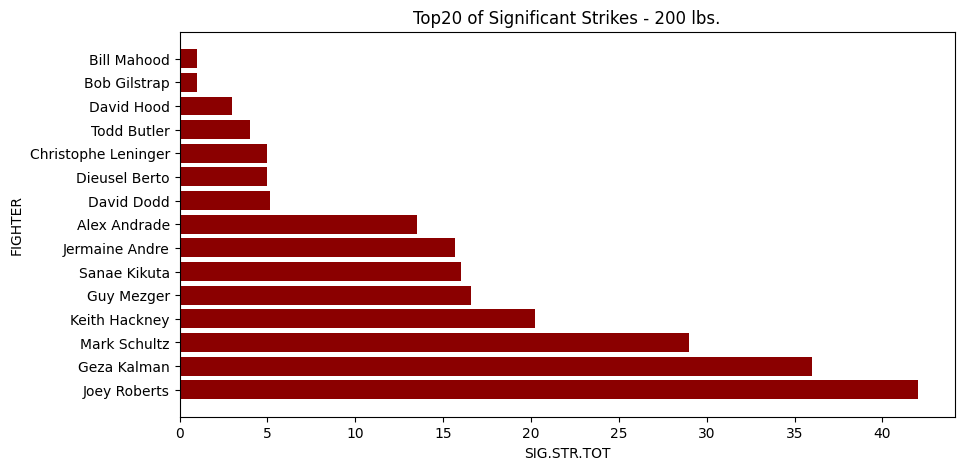

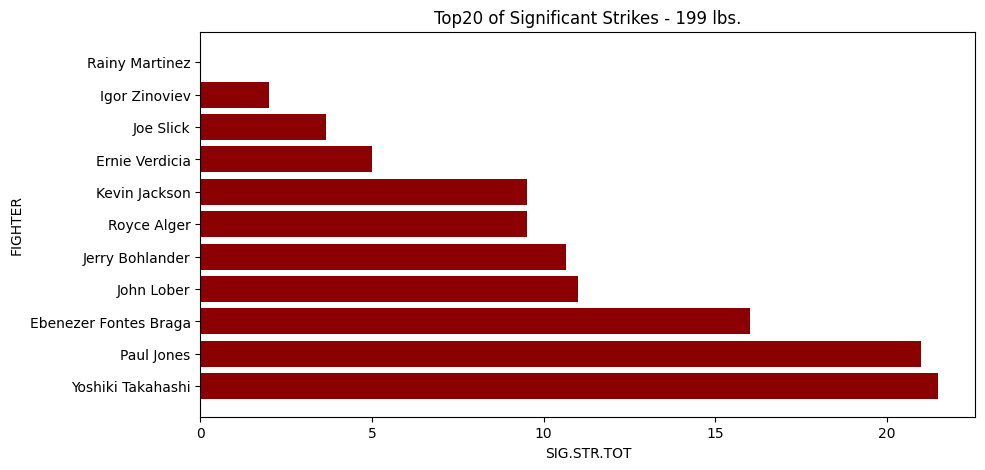

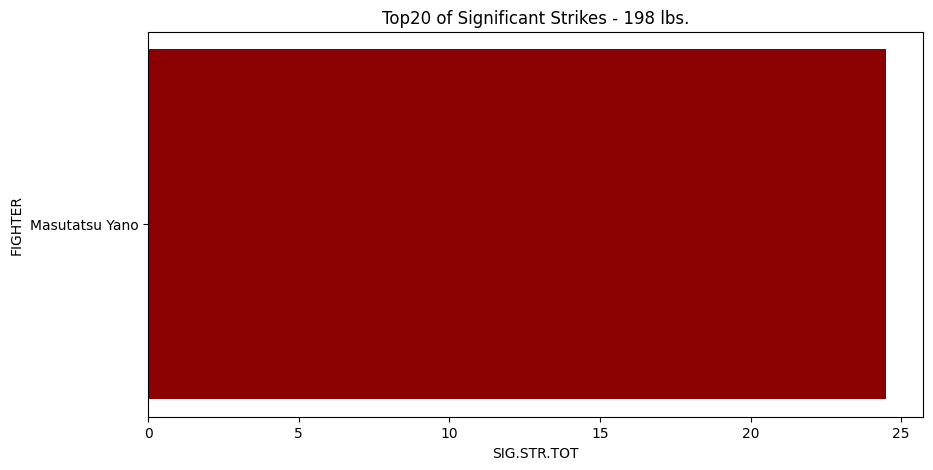

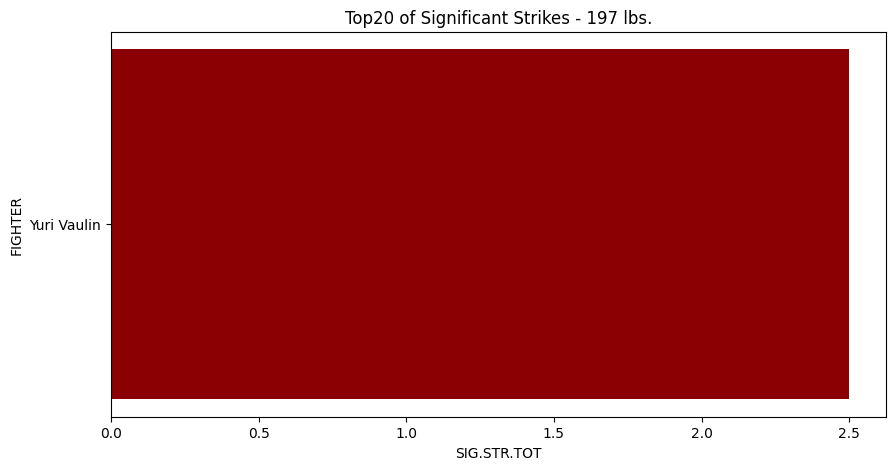

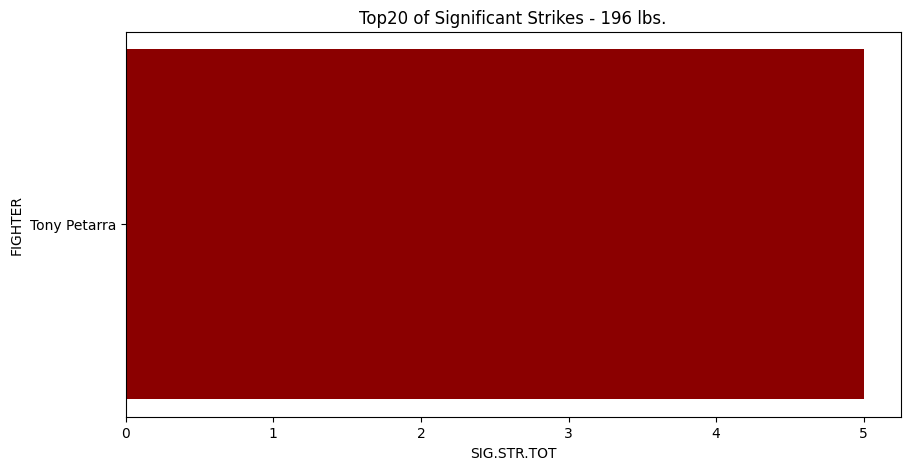

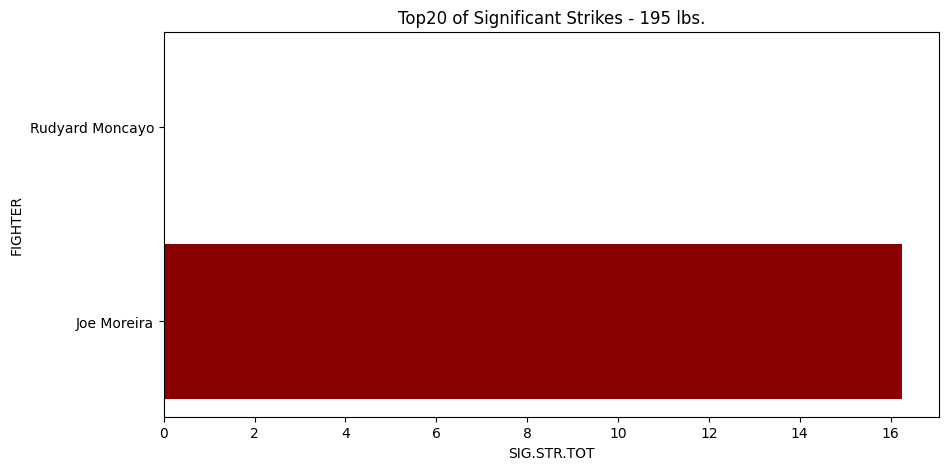

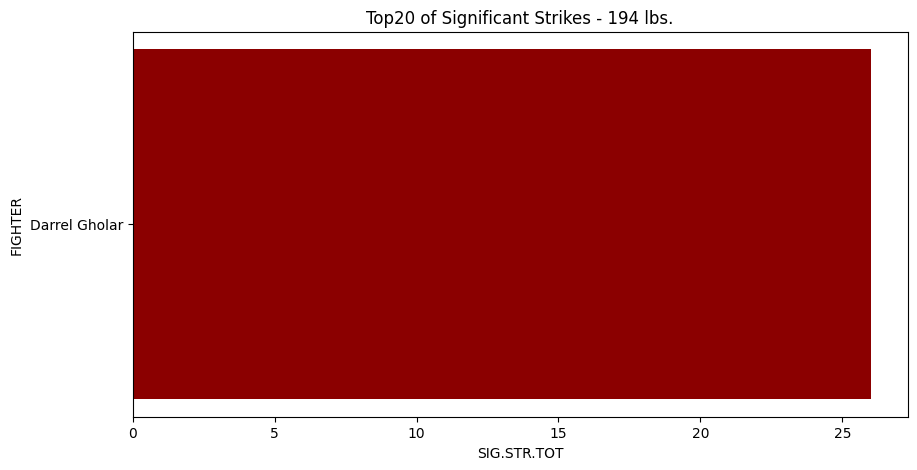

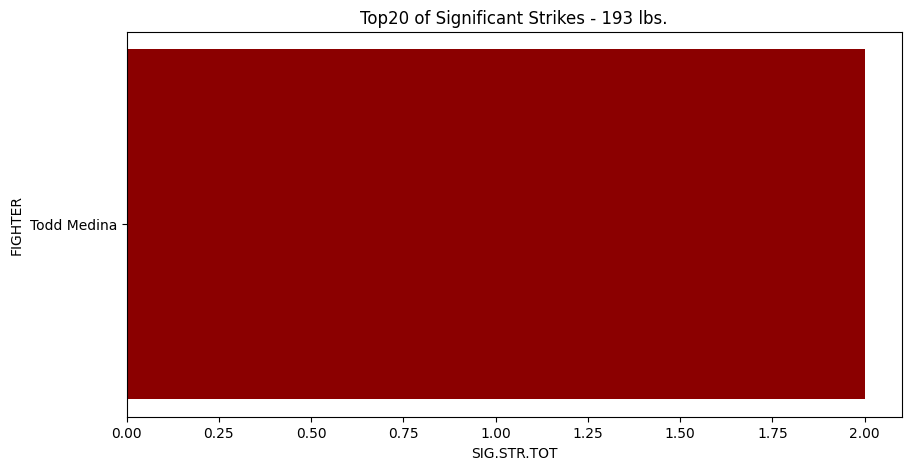

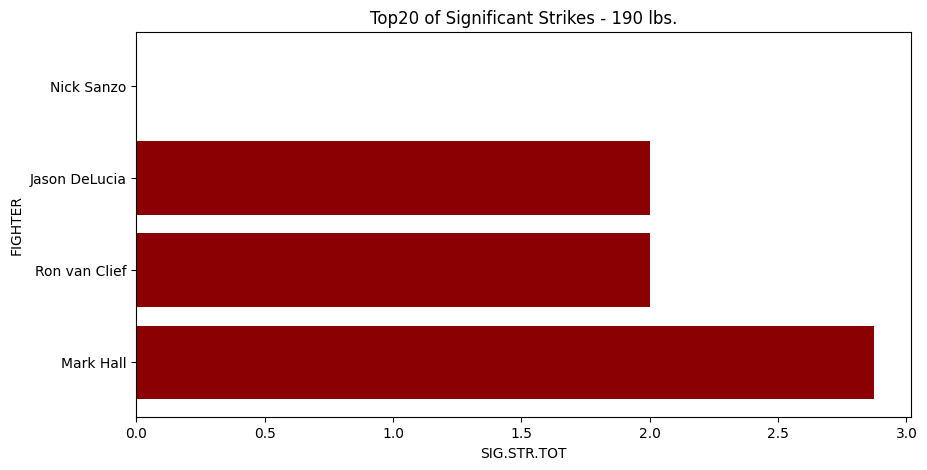

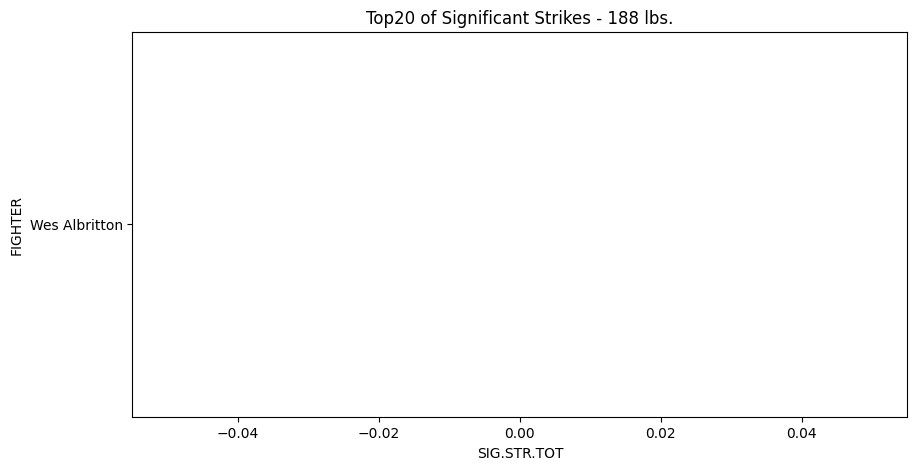

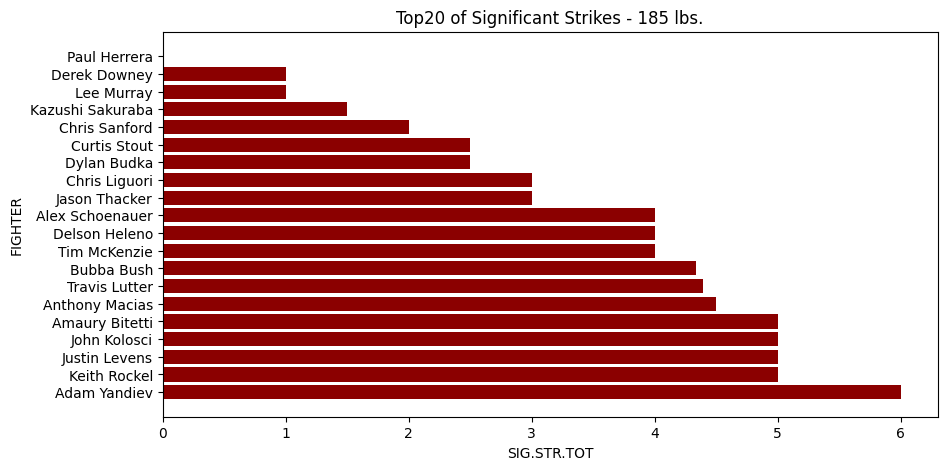

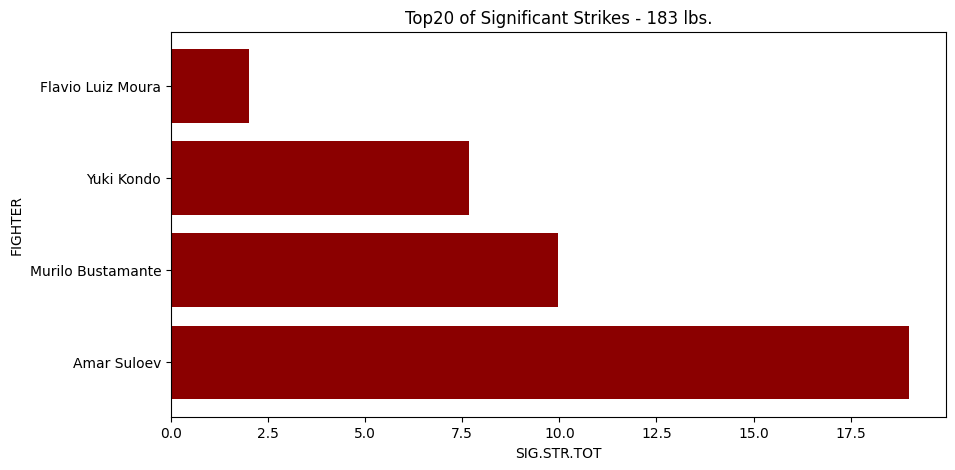

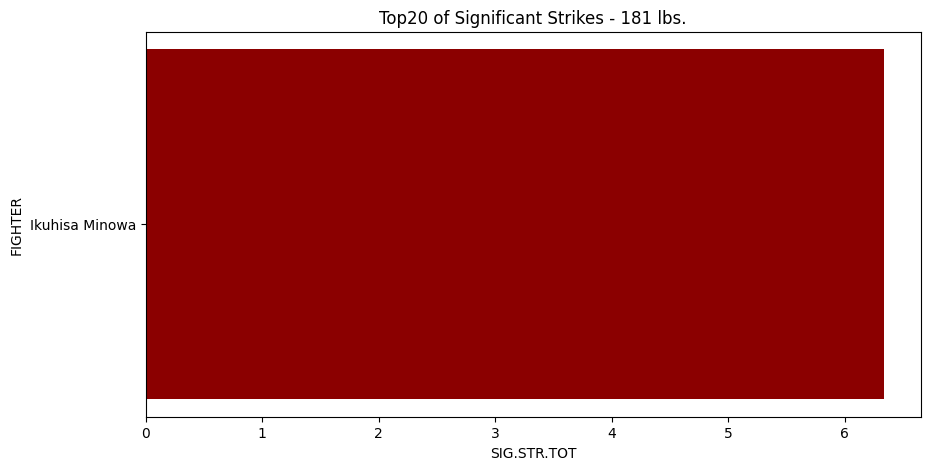

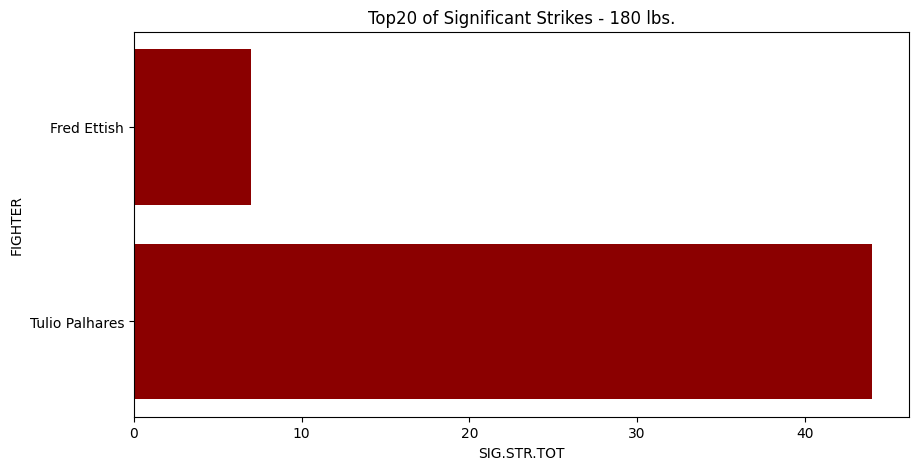

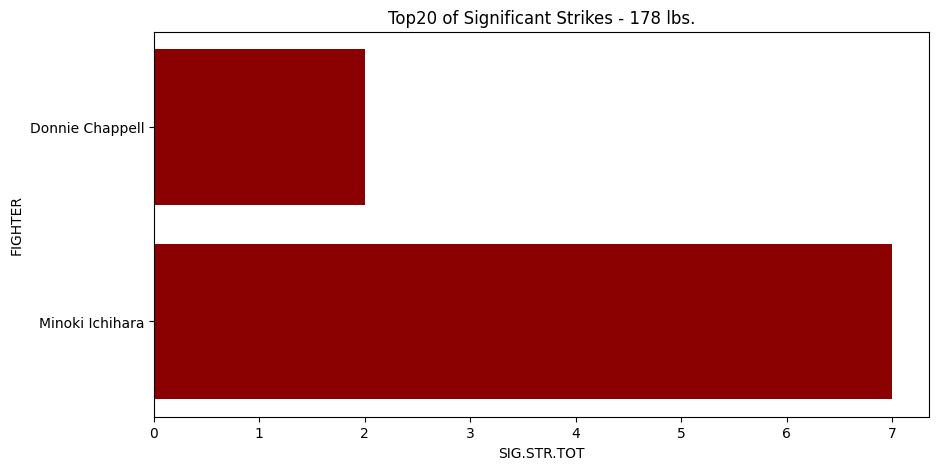

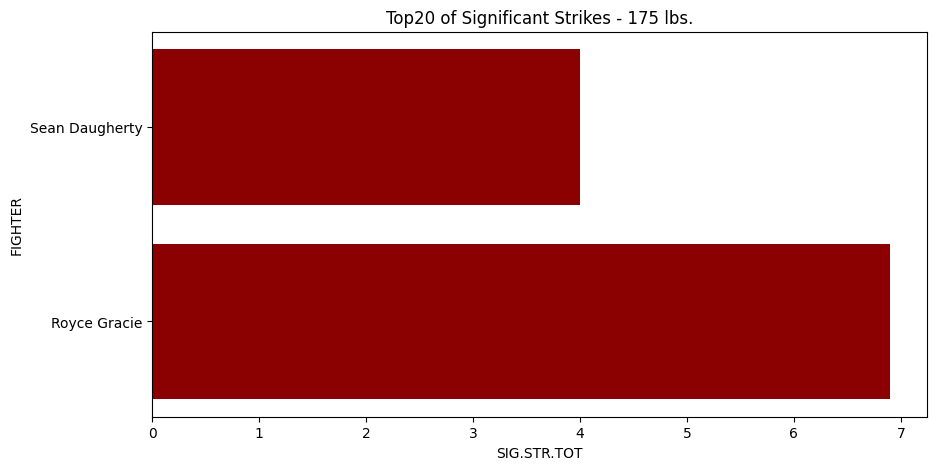

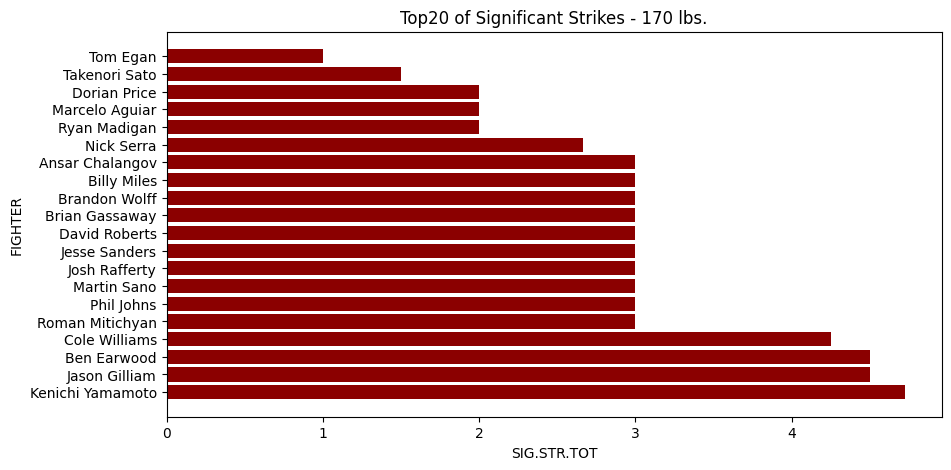

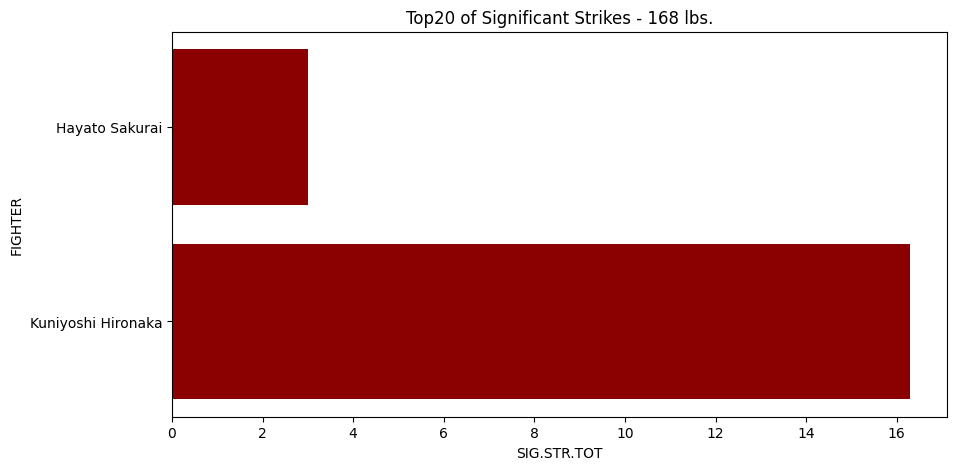

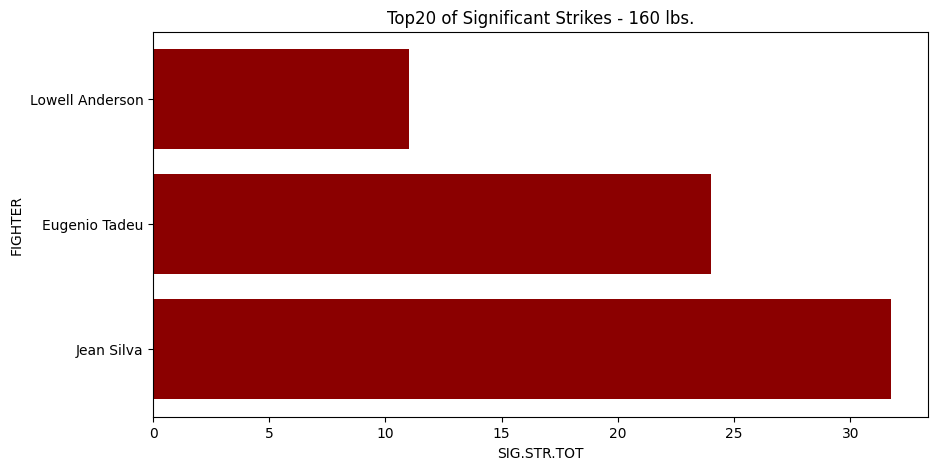

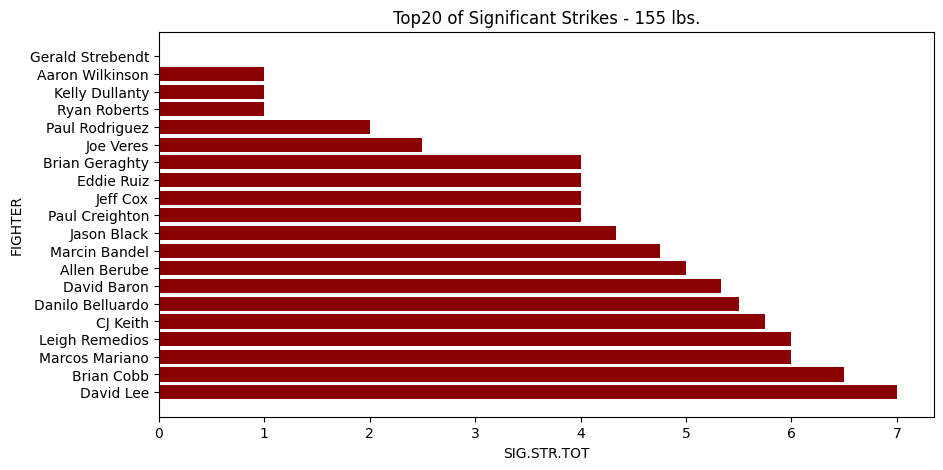

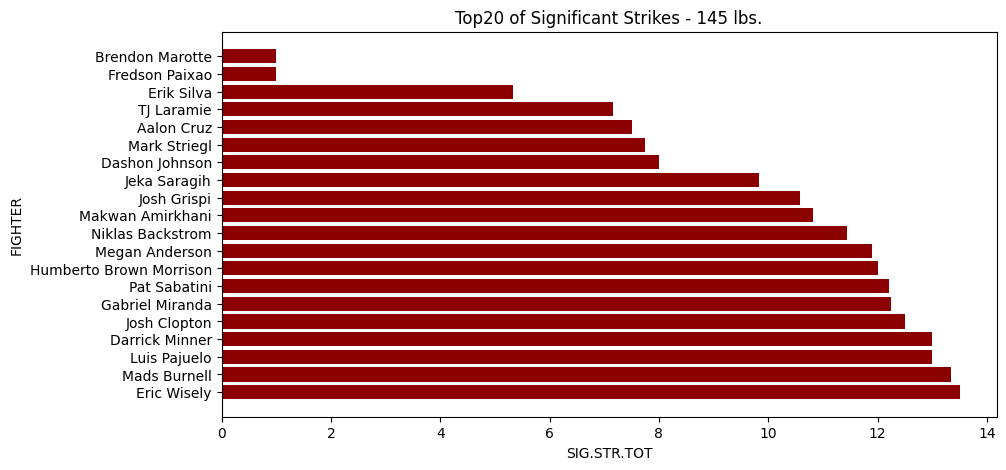

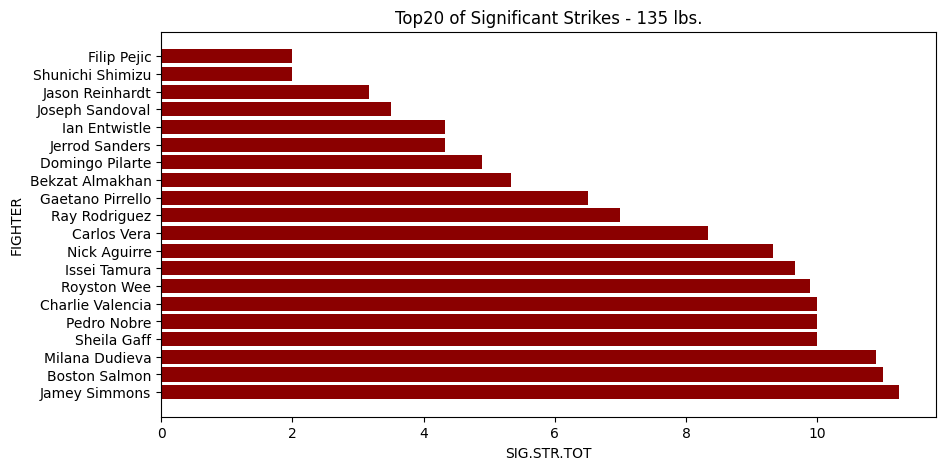

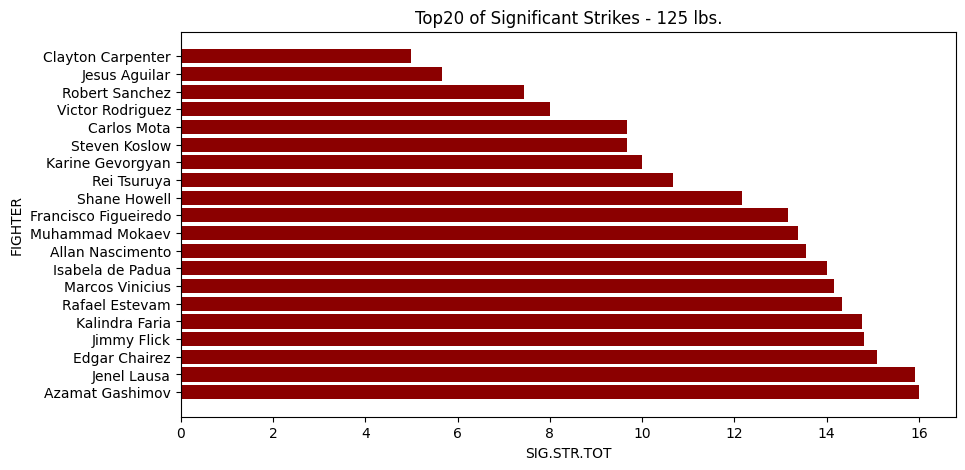

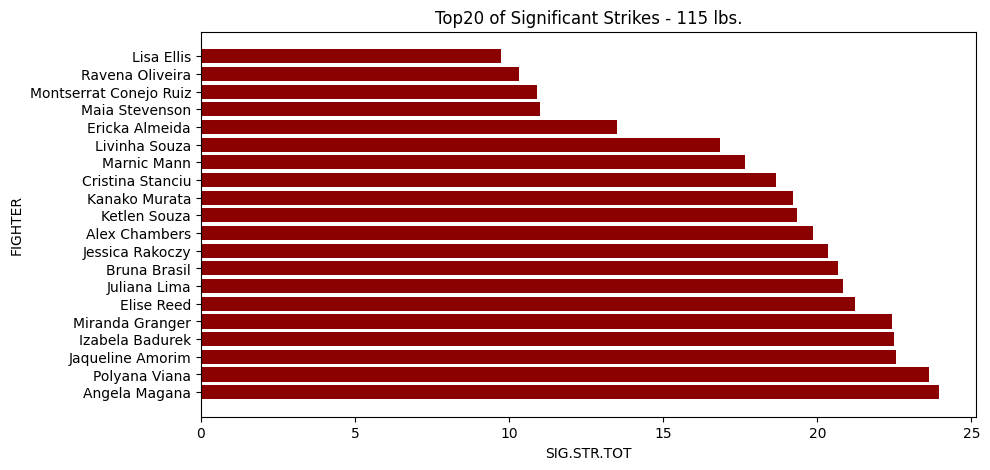

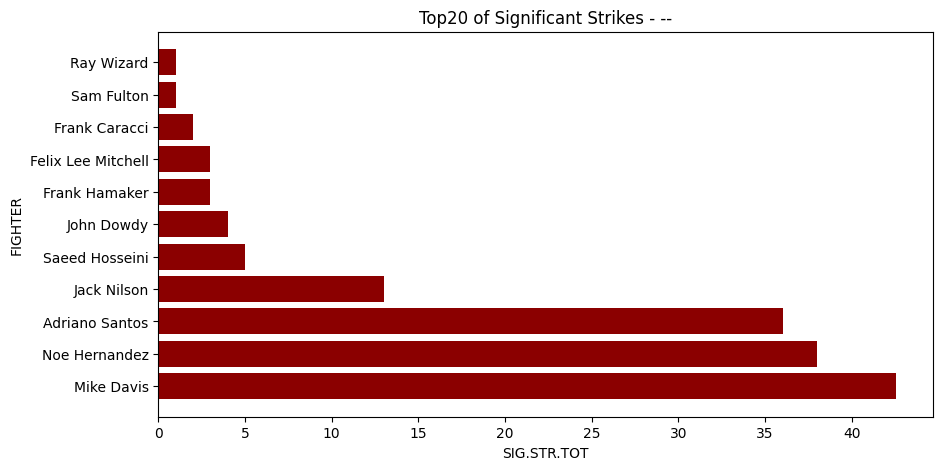

In [24]:
# Import library and dataframe
import matplotlib.pyplot as plt
df = df_ranking_top20

# Get uniques WEIGHT classes 
weight_classes = df['WEIGHT'].unique()

# Create horizontal bar charts (Matplotlib)
for weight in weight_classes:
    df_weight = df[df['WEIGHT'] == weight]
    plt.figure(figsize=(10, 5))
    plt.barh(df_weight['FIGHTER'], df_weight['SIG.STR.TOT'], color='darkred')
    plt.xlabel('SIG.STR.TOT')
    plt.ylabel('FIGHTER')
    plt.title(f'Top20 of Significant Strikes - {weight}')
    plt.gca().invert_yaxis()
    plt.show()